# LOAN DEFAULTERS CLASSIFICATION

## Dataset Description:

| Column Name            | Description                                                                                       |
|------------------------|---------------------------------------------------------------------------------------------------|
| earliest_cr_line       | The month the borrower's earliest reported credit line was opened                                 |
| emp_title              | The job title supplied by the Borrower when applying for the loan.                                 |
| fico_range_high        | The upper boundary range the borrower’s FICO at loan origination belongs to.                        |
| fico_range_low         | The lower boundary range the borrower’s FICO at loan origination belongs to.                        |
| Grade                  | LC assigned loan grade                                                                            |
| application_type       | Indicates whether the loan is an individual application or a joint application with two co-borrowers |
| initial_list_status    | The initial listing status of the loan. Possible values are – W, F                                 |
| num_actv_bc_tl        | Number of currently active bankcard accounts.                                                      |
| mort_acc               | Number of mortgage accounts.                                                                      |
| tot_cur_bal            | Total current balance of all accounts                                                             |
| open_acc               | The number of open credit lines in the borrower's credit file.                                      |
| pub_rec                | Number of derogatory public records                                                               |
| pub_rec_bankruptcies  | Number of public record bankruptcies.                                                              |
| Purpose                | A category provided by the borrower for the loan request.                                          |
| revol_bal              | Total credit revolving balance                                                                    |
| Title                  | The loan title provided by the borrower                                                           |
| total_acc              | The total number of credit lines currently in the borrower's credit file                           |
| verification_status    | Indicates if income was verified by LC, not verified, or if the income source was verified         |
| addr_state             | The state provided by the borrower in the loan application                                         |
| annual_inc             | The self-reported annual income provided by the borrower during registration.                      |
| emp_length             | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. |
| home_ownership         | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. |
| int_rate               | Interest Rate on the loan                                                                         |
| loan_amnt              | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. |
| sub_grade              | LC assigned loan subgrade                                                                         |
| Term                   | The number of payments on the loan. Values are in months and can be either 36 or 60.               |
| revol_util             | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. |
| Target                 | loan_status Status of the loan                                                                    |



<a id="table_content"></a>

## Table of Content
- **[1: Import Libraries](#l)**
- **[2: Read Dataset](#2)**
- **[3: Dataset Overview](#3)**
   - **[3.1: Summary Statistics of Numeric Features](#3.1)**
   - **[3.2: Summary Statistics of Categorical Features](#3.2)**
- **[4: EDA](#4)**
   - **[4.1:Univariate Analysis](#4.1)**
       - **[4.1.1 Numerical Features Univariate Analysis](#4.1.1)**
       - **[4.1.2 Categorical Features Univariate Analysis](#4.1.2)**
           - **[4.1.2.1: Low Cardinality Categorical Features](#4.1.2.1)**
           - **[4.1.2.2: High Cardinality Categorical Features](#4.1.2.1)**
   - **[4.2: Bivariate Analysis](#4.2)**
       - **[4.2.1: Numerical Features vs Target (loan_status)](#4.2.1)**
       - **[4.2.2: Categorical Features vs Target (loan_status)](#4.2.2)**
           - **[4.2.2.1: Low Cardinality Categorical Features vs Target (loan_status)](#4.2.2.1)**
           - **[4.2.2.2: High Cardinality Categorical Features vs Target (loan_status)](#4.2.2.2)**           
- **[5: Data Preprocessing](#5)**
    - **[5.1: Feature Selection and Engineering](#5.1)**
       - **[5.1.1: High Cardinal Categorical Features](#5.1.1)**
       - **[5.1.2: Low Cardinal Categorical Features](#5.1.2)**
   - **[5.2: Handle Missing Values](#5.2)**
   - **[5.3: Outlier Treatment](#5.3)**
   - **[5.4: Duplicated Data](#5.4)**
   - **[5.5: Encode Categorical Variables](#5.5)**
   - **[5.6: Check unbalance](#5.5)**
       - **[5.6.1: Handling unbalance](#5.6.1)**
- **[6:Busimess Requirement](#6)**
- **[7: Spliting Training Dataset](#7)**
- **[8: Decision Tree Mode Building](#8)**
   - **[8.1: DT Base Model Definition](#8.1)**
   - **[8.2: DT Hyperparameter Tuning](#8.2)**
   - **[8.3: DT Model Evaluation](#8.3)**
   - **[8.4: Target Prediction for Test Data](#8.4)**
- **[9: Random Forest Mode Building](#9)**
   - **[9.1: RF Base Model Definition](#9.1)**
   - **[9.2: RF Hyperparameter Tuning](#9.2)**
   - **[9.3: RF Model Evaluation](#9.3)**
   - **[9.4: Target Prediction for Test Data](#9.4)**
- **[10: XGBoost Mode Building](#10)**
   - **[10.1: XGBoost Base Model Definition](#10.1)**
   - **[10.2: Outlier treatment using Box-cox](#10.2)**
   - **[10.3: XGBoost Hyperparameter Tuning](#10.3)**
   - **[10.4: XGBoost Model Evaluation](#10.4)**
   - **[10.5: Target Prediction for Test Data](#10.5)**
- **[11:Conclusion](#11)**  

 
 
   

# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #90CDF4; font-size: 16px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">1: Import Libraries</p>




 ⬆️[Table Contents](#table_content)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

import xgboost as xgb
%matplotlib inline

# <p id="2" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #90CDF4; font-size: 16px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">2: Read Dataset</p>
 ⬆️[Table Contents](#table_content)

In [2]:
# Load training and testing datasets
train_df = pd.read_csv("train_loan_data (1).csv")
test_df = pd.read_csv("test_loan_data (1).csv")

In [3]:
train_df.shape

(80000, 28)

In [4]:
test_df.shape

(20000, 27)

In [5]:
pd.set_option('display.max_columns',29)

In [6]:
df = train_df.copy()
df.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0           Jul-97  10+ years   
1         CA     40000.0           Apr-87  10+ years   
2         FL     60000.0           Aug-07  10+ years   
3         IL    100742.0           Sep-80  10+ years   
4         MD     80000.0           Jul-99  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type initial_list_status  int_rate  loan_amnt  \
0       MORTGAGE       Individual                   w     18.99      18075   
1           RENT       Individual                   w     10.16       8800   
2       MORTGAGE       Individual                   w     11.47      18000   
3       MORTGAGE       Individual                   w      9.16      20000   
4           RENT       Individual                   f     23.83      35000   

   num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0             1.0       1.0     319479.0         7        0   
1             4.0       0.0      19944.0         5        0   
2             4.0       2.0      23199.0         7        0   
3             4.0       1.0      72651.0        12        0   
4            14.0       7.0      64631.0        23        0   

   pub_rec_bankruptcies             purpose  revol_bal  revol_util sub_grade  \
0                   0.0  debt_consolidation       5338        93.6        E1   
1                   0.0  debt_consolidation      19944        60.3        B1   
2                   0.0  debt_consolidation      23199        88.5        B5   
3                   0.0  debt_consolidation      18425        69.0        B2   
4                   0.0  debt_consolidation      34370        90.0        F5   

         term                title  total_acc verification_status loan_status  
0   60 months   Debt consolidation          8     Source Verified   Defaulted  
1   36 months          Credit Loan         12            Verified        Paid  
2   36 months   Debt consolidation         16     Source Verified        Paid  
3   36 months   Debt consolidation         19     Source Verified        Paid  
4   60 months  Debt Connsolidation         59            Verified        Paid

In [7]:
df.shape

(80000, 28)

# <p id="3" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #90CDF4; font-size: 16px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3: Dataset Overview</p>
 ⬆️[Table Contents](#table_content)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [9]:
for i in df.columns:
    print(i, df[i].nunique())

addr_state 51
annual_inc 7536
earliest_cr_line 640
emp_length 11
emp_title 36661
fico_range_high 38
fico_range_low 38
grade 7
home_ownership 6
application_type 2
initial_list_status 2
int_rate 549
loan_amnt 1373
num_actv_bc_tl 28
mort_acc 28
tot_cur_bal 65410
open_acc 56
pub_rec 15
pub_rec_bankruptcies 8
purpose 14
revol_bal 32971
revol_util 1080
sub_grade 35
term 2
title 5348
total_acc 107
verification_status 3
loan_status 2


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    
<b>Inference</b>:<br>
<ul style="list-style-type: square; color: #004085;">
    <li>The dataset contains <b>80000</b> entries.</li>
    <li>Each entry represents a loan application.</li>
    <li>There are <b>28</b> columns in the dataset.</li>
    <li>The columns represent various features such as:</li>
    <ul style="list-style-type: disc; color: #004085;">
        <li>State of the borrower's address (addr_state)</li>
        <li>Annual income (annual_inc)</li>
        <li>Earliest reported credit line (earliest_cr_line)</li>
        <li>Employment length (emp_length)</li>
        <li>Job title (emp_title)</li>
        <li>FICO score range (fico_range_high, fico_range_low)</li>
        <li>Loan grade (grade)</li>
        <li>Home ownership status (home_ownership)</li>
        <li>Application type (application_type)</li>
        <li>Initial listing status (initial_list_status)</li>
        <li>Interest rate (int_rate)</li>
        <li>Loan amount (loan_amnt)</li>
        <li>Number of active bankcard accounts (num_actv_bc_tl)</li>
        <li>Number of mortgage accounts (mort_acc)</li>
        <li>Total current balance of all accounts (tot_cur_bal)</li>
        <li>Number of open credit lines (open_acc)</li>
        <li>Number of derogatory public records (pub_rec)</li>
        <li>Number of public record bankruptcies (pub_rec_bankruptcies)</li>
        <li>Loan purpose (purpose)</li>
        <li>Total credit revolving balance (revol_bal)</li>
        <li>Revolving line utilization rate (revol_util)</li>
        <li>Loan subgrade (sub_grade)</li>
        <li>Term of the loan (term)</li>
        <li>Loan title (title)</li>
        <li>Total number of credit lines (total_acc)</li>
        <li>Income verification status (verification_status)</li>
        <li>Loan status (loan_status)</li>
        <li>Loan type (type)</li>
    </ul>
        <li>There are missing values in several columns such as:</li>
    <ul style="list-style-type: disc; color: #004085;">
        <li>Employment length (emp_length)</li>
        <li>Job title (emp_title)</li>
        <li>Number of active bankcard accounts (num_actv_bc_tl)</li>
        <li>Number of mortgage accounts (mort_acc)</li>
        <li>Total current balance of all accounts (tot_cur_bal)</li>
        <li>Number of public record bankruptcies (pub_rec_bankruptcies)</li>
        <li>Revolving line utilization rate (revol_util)</li>
        <li>Loan title (title)</li>
        <li>Loan status (loan_status)</li>
    </ul>
    <li>The target variable is '<b>loan_status</b>', which represents the status of the loan application.</li>
    <li>The features include a mix of numerical (float64) and categorical (object) data types.</li>
    <li>The dataset requires handling missing values before proceeding with analysis or modeling.</li>
    <li>Further analysis could involve exploring relationships between different features and the loan status, as well as building predictive models to classify loan applications based on their status.</li>
</ul>
    
</div>


## 3.1: Summary Statistics for Numerical Features

 ⬆️[Table Contents](#table_content)

In [10]:
df.describe().T

count           mean            std     min       25%  \
annual_inc            80000.0   76046.143138   69020.055377    0.00  46000.00   
fico_range_high       80000.0     699.987975      31.734840  664.00    674.00   
fico_range_low        80000.0     695.987813      31.734075  660.00    670.00   
int_rate              80000.0      13.232898       4.771705    5.31      9.75   
loan_amnt             80000.0   14403.867813    8703.826298  750.00   7925.00   
num_actv_bc_tl        76052.0       3.633790       2.262505    0.00      2.00   
mort_acc              77229.0       1.674759       2.005104    0.00      0.00   
tot_cur_bal           76052.0  141586.358991  159371.366632    0.00  29642.00   
open_acc              80000.0      11.605675       5.483362    1.00      8.00   
pub_rec               80000.0       0.216675       0.579854    0.00      0.00   
pub_rec_bankruptcies  79969.0       0.137103       0.383202    0.00      0.00   
revol_bal             80000.0   16289.340975   22649.147472    0.00   5965.75   
revol_util            79947.0      51.899142      24.504836    0.00     33.50   
total_acc             80000.0      25.036875      12.009194    2.00     16.00   

                           50%        75%         max  
annual_inc            65000.00   90000.00  7141778.00  
fico_range_high         694.00     714.00      850.00  
fico_range_low          690.00     710.00      845.00  
int_rate                 12.74      15.99       30.99  
loan_amnt             12000.00   20000.00    40000.00  
num_actv_bc_tl            3.00       5.00       32.00  
mort_acc                  1.00       3.00       32.00  
tot_cur_bal           81000.50  211027.25  5172185.00  
open_acc                 11.00      14.00       80.00  
pub_rec                   0.00       0.00       24.00  
pub_rec_bankruptcies      0.00       0.00        7.00  
revol_bal             11111.00   19635.00  1023940.00  
revol_util               52.20      70.80      152.60  
total_acc                23.00      32.00      162.00

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <b>Inference</b>:<br>
    <ul style="list-style-type: square; color: #004085;">
        <ul>
    <li><b>Annual Income (annual_inc):</b> The dataset shows a wide range of annual incomes among loan applicants, from 0 to over 7 million USD, with an average income of approximately 76,046 USD. The significant standard deviation (69,020 USD) suggests a broad distribution of income levels.</li>
    <li><b>FICO Scores (fico_range_high, fico_range_low):</b> The FICO scores range narrowly from 660 to 850 for fico_range_low and 664 to 850 for fico_range_high, indicating that all applicants have relatively good credit scores. The median FICO score sits around the low 690s to mid-690s, which is considered a decent credit score range.</li>
    <li><b>Interest Rates (int_rate):</b> Interest rates on loans vary widely from 5.31% to 30.99%, with an average rate of approximately 13.23%. This variation is likely due to differences in credit risk, loan amount, and term lengths among applicants.</li>
    <li><b>Loan Amount (loan_amnt):</b> Loan amounts requested range from 750 USD to 40,000 USD, with the average loan amount being around 14,403 USD. This suggests that most loans are of moderate size.</li>
    <li><b>Active Bankcard Accounts (num_actv_bc_tl):</b> On average, applicants have around 3 to 4 active bankcard accounts, indicating moderate credit activity. The range from 0 to 32 suggests a wide variance in how actively applicants use credit.</li>
    <li><b>Mortgage Accounts (mort_acc):</b> The average number of mortgage accounts is relatively low (about 1.67), with most applicants having between 0 and 3 mortgage accounts. This suggests that a large portion of the dataset's applicants may not own property or have multiple properties.</li>
    <li><b>Total Current Balance (tot_cur_bal):</b> Balances on all accounts range broadly, indicating significant differences in financial positions among applicants. The mean balance is around 141,586 USD, with a substantial standard deviation, reflecting a wide disparity in total balances.</li>
    <li><b>Open Credit Lines (open_acc):</b> The average number of open credit lines is around 11-12, suggesting that applicants have several credit relationships, which could include credit cards, loans, and lines of credit.</li>
    <li><b>Public Records (pub_rec and pub_rec_bankruptcies):</b> Most applicants have 0 entries in these categories, indicating few issues with legal judgments, bankruptcies, or similar financial difficulties. The maximum values suggest that a few applicants have significant negative marks.</li>
    <li><b>Revolving Balance (revol_bal) and Utilization (revol_util):</b> The average revolving balance is around 16,289 USD, with a utilization rate averaging 51.9%. This suggests that, on average, applicants are using slightly over half of their available revolving credit, which is a critical factor in credit scoring models.</li>
    <li><b>Total Accounts (total_acc):</b> The average number of total credit lines (including both current and closed accounts) is around 25, indicating that applicants have a moderate level of credit history.</li>
</ul>
<p><b>Overall Impression:</b> The dataset reflects a diverse group of loan applicants, showing variation in income, credit usage, and financial health. The wide range of incomes and high standard deviation suggests economic diversity. The generally good FICO scores indicate a reasonably creditworthy group, while the variation in interest rates, loan amounts, and credit activity levels reflect the individualized nature of lending decisions. The presence of missing values in several columns signals the need for data cleaning and imputation before further analysis or modeling efforts.</p>

</div>


## 3.2: Summary Statistics for Categorical Features
 ⬆️[Table Contents](#table_content)

In [11]:
df.describe(include="object")

addr_state earliest_cr_line emp_length emp_title  grade home_ownership  \
count       80000            80000      75412     74982  80000          80000   
unique         51              640         11     36661      7              6   
top            CA           Sep-03  10+ years   Teacher      B       MORTGAGE   
freq        11744              547      26278      1278  23502          39628   

       application_type initial_list_status             purpose sub_grade  \
count             80000               80000               80000     80000   
unique                2                   2                  14        35   
top          Individual                   w  debt_consolidation        C1   
freq              78446               46745               46418      4982   

              term               title verification_status loan_status  
count        80000               79030               80000       80000  
unique           2                5348                   3           2  
top      36 months  Debt consolidation     Source Verified        Paid  
freq         60750               39396               30855       64030

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <b>Inference</b>:<br>
    <ul style="list-style-type: square; color: #004085;">
        <li><b>Address State:</b> There are <b>51</b> unique states represented in the dataset, with <b>CA</b> being the most frequent state, occurring <b>11744</b> times. This indicates that a significant number of loan applicants are from California.</li>
        <li><b>Earliest Credit Line:</b> The feature represents the month and year when the borrower's earliest reported credit line was opened. It has <b>640</b> unique values, with the most common being <b>Sep-03</b>, occurring <b>547</b> times.</li>
        <li><b>Employment Length:</b> This feature indicates the length of employment in years. The most frequent value is <b>10+ years</b>, occurring <b>26278</b> times, suggesting that many applicants have long-term employment.</li>
        <li><b>Employment Title:</b> There are <b>36661</b> unique employment titles, with <b>Teacher</b> being the most common, occurring <b>1278</b> times. This indicates a wide variety of job titles among loan applicants.</li>
        <li><b>Loan Grade:</b> The loan grade assigned by the lending institution ranges from <b>A</b> to <b>G</b>, with <b>B</b> being the most common grade, occurring <b>23502</b> times.</li>
        <li><b>Home Ownership:</b> There are <b>6</b> unique categories representing home ownership status, with <b>MORTGAGE</b> being the most common, occurring <b>39628</b> times.</li>
        <li><b>Application Type:</b> Indicates whether the loan application is individual or joint. The majority of applications are <b>Individual</b>, occurring <b>78446</b> times.</li>
        <li><b>Initial List Status:</b> Represents the initial listing status of the loan. The majority of loans have an initial list status of <b>W</b>, occurring <b>46745</b> times.</li>
        <li><b>Purpose:</b> Describes the purpose of the loan request. The most common purpose is <b>Debt consolidation</b>, occurring <b>46418</b> times.</li>
        <li><b>Loan Sub Grade:</b> Represents a sub-category within the loan grade, ranging from <b>A1</b> to <b>G5</b>. The most common sub-grade is <b>C1</b>, occurring <b>4982</b> times.</li>
        <li><b>Term:</b> Indicates the number of payments on the loan, either <b>36 months</b> or <b>60 months</b>. The majority of loans have a term of <b>36 months</b>, occurring <b>60750</b> times.</li>
        <li><b>Title:</b> The loan title provided by the borrower. There are <b>5348</b> unique titles, with <b>Debt consolidation</b> being the most common, occurring <b>39396</b> times.</li>
        <li><b>Verification Status:</b> Indicates whether income was verified by the lending institution. The most common verification status is <b>Source Verified</b>, occurring <b>30855</b> times.</li>
        <li><b>Loan Status:</b> Represents the status of the loan. It appears that <b>paid</b> is the most common status, occurring <b>64030</b> times.which will lead to unbalance of data</li>
    </ul>
</div>


# <p id="4" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #90CDF4; font-size: 16px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">4: EDA</p>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>Note 📝:</h3>
    <p>It is better to perform Exploratory Data Analysis (EDA) before handling missing values. Doing EDA after handling missing values have a higher likelihood of using techniques based on false assumptions, which will hamper data quality. Poorer data quality will naturally have a negative influence on any machine learning model built in the subsequent modeling phase (garbage in, garbage out).</p>
    <p><b>Using EDA for Missing Data:</b></p>
    <ul>
        <li>EDA is an effective way to grasp the key characteristics of the dataset and its missing values.</li>
        <li>By arming yourself with more information on the missing data, you will be able to make more informed decisions with regard to how these missing values should be dealt with.</li>
    </ul>
</div>


In [12]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use white grid
sns.set(rc={'axes.facecolor': '#FFF2CC'}, style='whitegrid')


## 4.1: Univariate Analysis
<a id="4.1"></a>
 ⬆️[Table Contents](#table_content)

### 4.1.1 Numerical Features Univariate Analysis
<a id="4.1.1"></a>
 ⬆️[Table Contents](#table_content)

In [13]:
continuous_features = df.describe().columns

In [14]:
continuous_features

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

In [15]:
df_continuous = df[continuous_features]

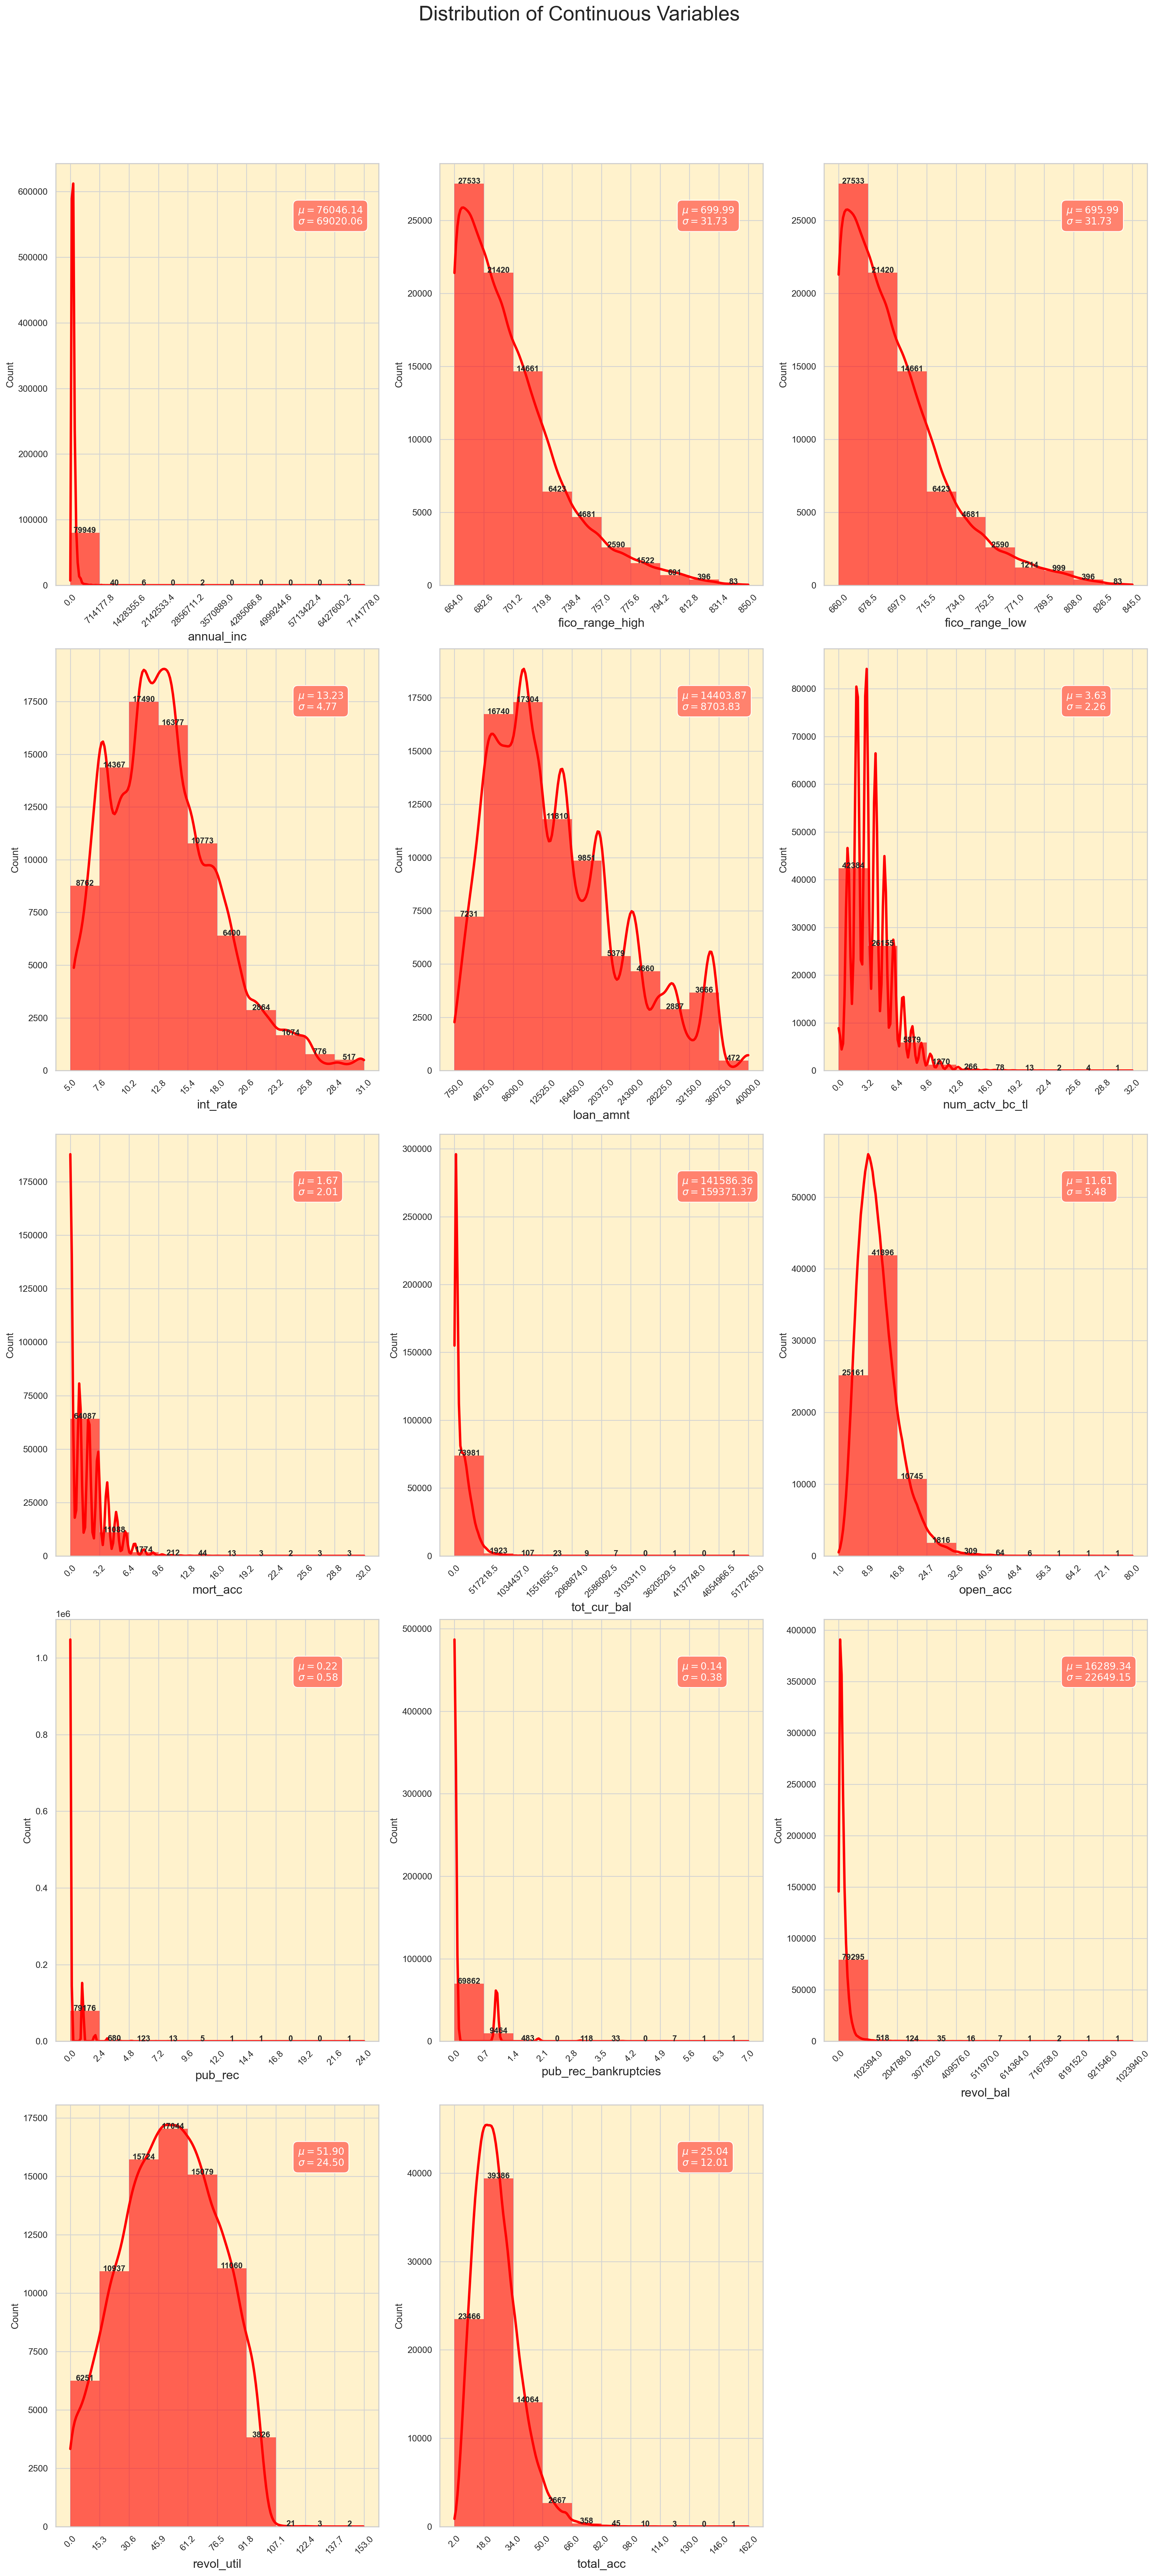

In [16]:
# Set up the subplot
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 45))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[4,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">

<b>Inference</b>:<br>
    <ul>
    <li><b>Annual Income (annual_inc):</b> The distribution is heavily right-skewed, suggesting that most applicants have incomes on the lower end of the scale, with a few applicants having very high incomes.</li>
    <li><b>FICO Scores (fico_range_high and fico_range_low):</b> Both high and low ranges of FICO scores show a left-skewed distribution, indicating that a majority of the applicants have higher credit scores.</li>
    <li><b>Interest Rates (int_rate):</b> The interest rate distribution is slightly right-skewed, which may suggest that more loans are given at higher interest rates.</li>
    <li><b>Loan Amount (loan_amnt):</b> This distribution is multi-modal, indicating popular set amounts for loans that may be related to standard loan products.</li>
    <li><b>Number of Active Bankcard Accounts (num_actv_bc_tl):</b> This is a right-skewed distribution, suggesting that most applicants have a few active bankcard accounts.</li>
    <li><b>Mortgage Accounts (mort_acc):</b> Also right-skewed, most applicants have zero or one mortgage account, with few having multiple.</li>
    <li><b>Total Current Balance (tot_cur_bal):</b> The distribution is right-skewed, indicating that most applicants have a lower total current balance, with a few applicants having very high balances.</li>
    <li><b>Open Credit Lines (open_acc):</b> This distribution is roughly symmetric with a slight right-skew, suggesting a fairly normal distribution of the number of open credit lines among applicants.</li>
    <li><b>Public Records (pub_rec):</b> The data is highly right-skewed, with most applicants having zero public records, which indicates a good sign of financial responsibility among the applicants.</li>
    <li><b>Public Record Bankruptcies (pub_rec_bankruptcies):</b> Similar to public records, most applicants have zero bankruptcies, with the distribution being highly right-skewed.</li>
    <li><b>Revolving Balance (revol_bal):</b> The distribution is right-skewed, showing that most applicants maintain lower balances on their revolving credit.</li>
    <li><b>Revolving Line Utilization (revol_util):</b> This histogram appears normally distributed, suggesting that revolving line utilization rates are spread fairly evenly across the applicants.</li>
    <li><b>Total Number of Credit Lines (total_acc):</b> This variable shows a right-skew in its distribution, indicating that most applicants have a moderate number of total credit lines.</li>
</ul>

</div>


### 4.1.2: Categorical Features Univariate Analysis
<a id="4.1.2"></a>
 ⬆️[Table Contents](#table_content)

#### 4.1.2.1: Low Cardinality Categorical Features
<a id="4.1.2.1"></a>
 ⬆️[Table Contents](#table_content)

In [17]:
# Filter low cardinality features for the univariate analysis, excluding 'type' column
cat_cols = df.drop(continuous_features, axis = 1).columns
cat_cols

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

In [18]:
for i in cat_cols:
    print(i, df[i].nunique())

addr_state 51
earliest_cr_line 640
emp_length 11
emp_title 36661
grade 7
home_ownership 6
application_type 2
initial_list_status 2
purpose 14
sub_grade 35
term 2
title 5348
verification_status 3
loan_status 2


In [19]:
# Filter low cardinality features for the univariate analysis, excluding 'type' column
low_cardinality_fea = ['emp_length','grade','home_ownership','application_type','initial_list_status','purpose', 'term','verification_status','loan_status']
df_low_cardinality = df[low_cardinality_fea]

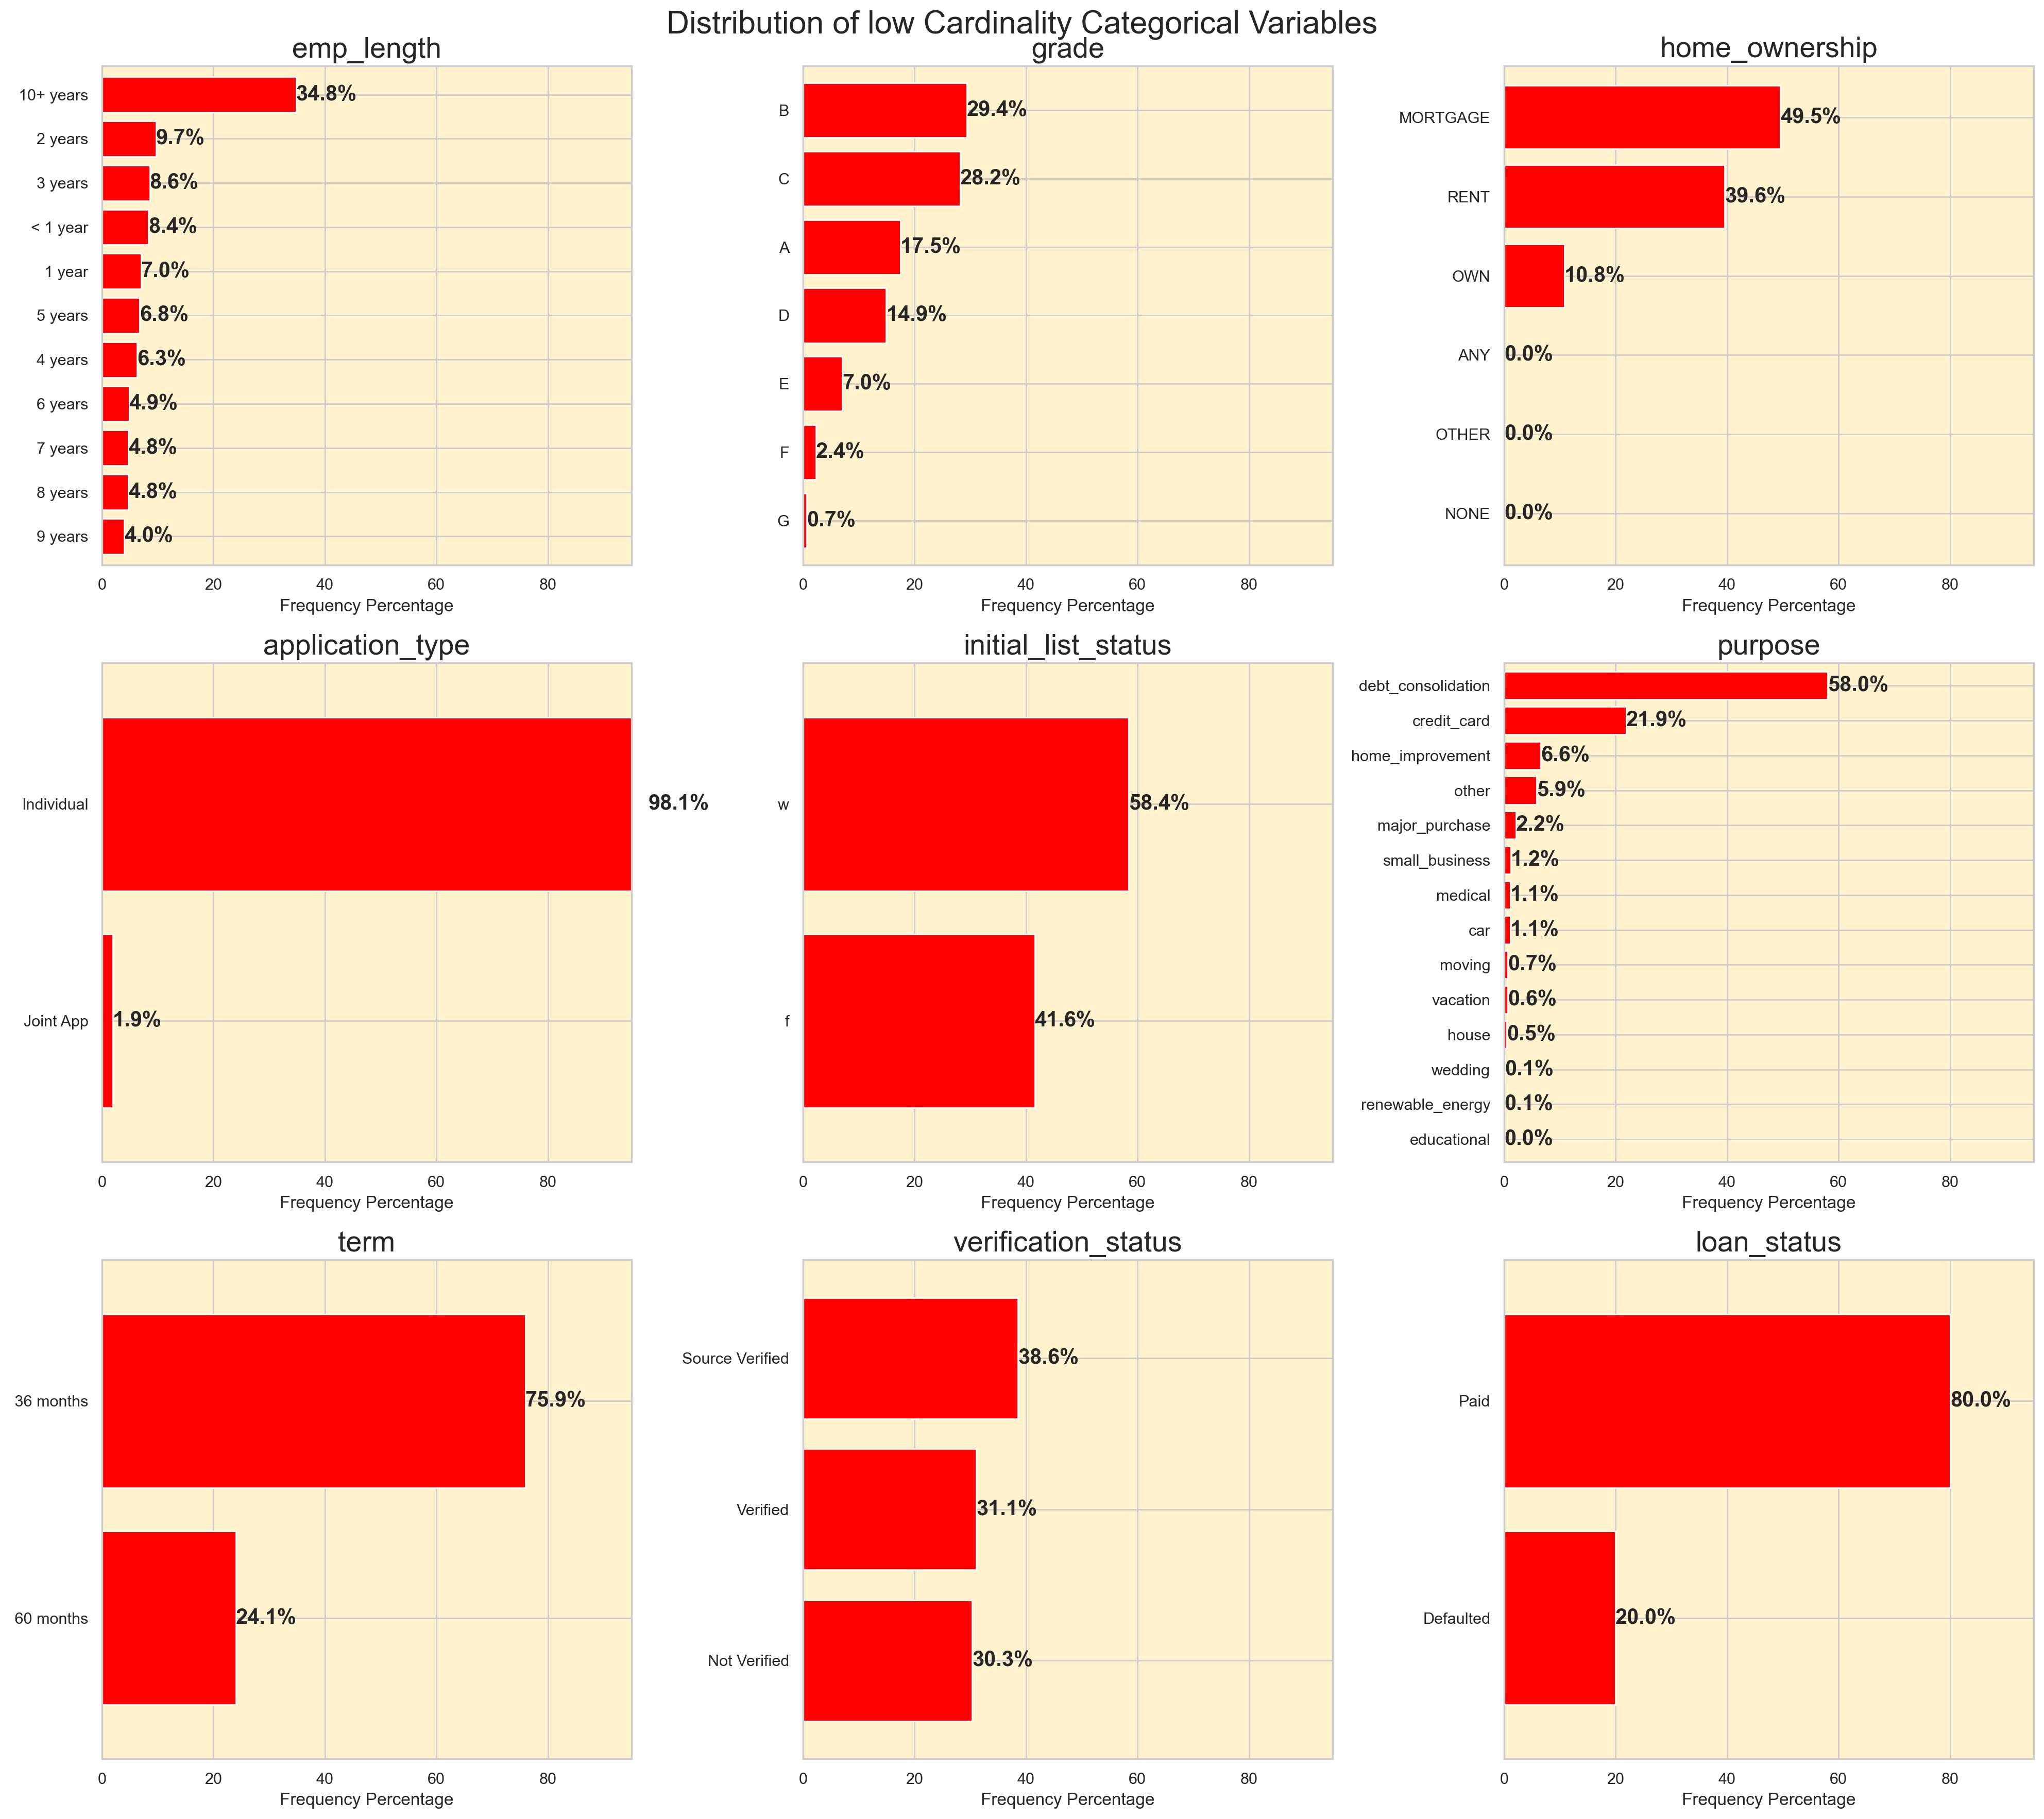

In [20]:
# Set up the subplot 
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(low_cardinality_fea):
    row = i // 3
    col_idx = i % 3
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

#ax[3,2].axis('off')
plt.suptitle('Distribution of low Cardinality Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">

<b>Inference</b>:<br>
<ul style="list-style-type: square; color: #004085;">
    <li><b>Application Type:</b> The majority of loan applications (98.1%) are from individuals rather than joint applications, indicating that individual borrowers are the primary applicants.</li>
    <li><b>Grade Distribution:</b> Grades "B" and "C" are the most common grades among loan applicants, suggesting that a significant proportion of applicants fall within these credit risk categories.</li>
    <li><b>Home Ownership:</b> The highest proportion of applicants indicate 'Mortgage' as their home ownership status, indicating that a substantial number of borrowers are homeowners with existing mortgages.</li>
    <li><b>Initial List Status:</b> The majority of loans have an initial listing status of 'W' (Whole), suggesting that most loans are initially listed as a whole rather than fractional.</li>
    <li><b>Loan Term:</b> The most preferred loan term among applicants is 36 months, indicating that a significant proportion of borrowers opt for shorter loan durations.</li>
    <li><b>Verification Status:</b> The majority of loan applicants have their income source as 'Source verified', with a somewhat balanced distribution between 'Verified' and 'Not Verified' statuses.</li>
    <li><b>Loan Status:</b> The most common loan status among applicants is 'Paid', indicating that a large number of borrowers have successfully repaid their loans.</li>
    <li><b>Employment Length:</b> Applicants with an employment length of '10+ years' are the most prevalent, indicating a significant number of borrowers with long-term employment.</li>
    <li><b>Purpose:</b> The most common purpose for loan applications is 'Debt Consolidation', followed by 'Credit Card', suggesting that many borrowers seek loans to consolidate existing debts or manage credit card balances.</li>
</ul>
    
</div>


#### 4.1.2.2: High Cardinality Categorical Features
<a id="4.1.2.2"></a>
 ⬆️[Table Contents](#table_content)
 <br>
**WE will focus on only TOP10 from each one**

In [21]:
# Filter high cardinality features for the univariate analysis, excluding 'type' column
high_cardinality_fea = list(set(cat_cols) - set(low_cardinality_fea))
df_high_cardinality = df[high_cardinality_fea]

In [22]:
df_high_cardinality.head()

title addr_state sub_grade earliest_cr_line  \
0   Debt consolidation         CO        E1           Jul-97   
1          Credit Loan         CA        B1           Apr-87   
2   Debt consolidation         FL        B5           Aug-07   
3   Debt consolidation         IL        B2           Sep-80   
4  Debt Connsolidation         MD        F5           Jul-99   

                        emp_title  
0                          Deputy  
1  Department of Veterans Affairs  
2                Marble polishing  
3                         printer  
4                   Southern Mgmt

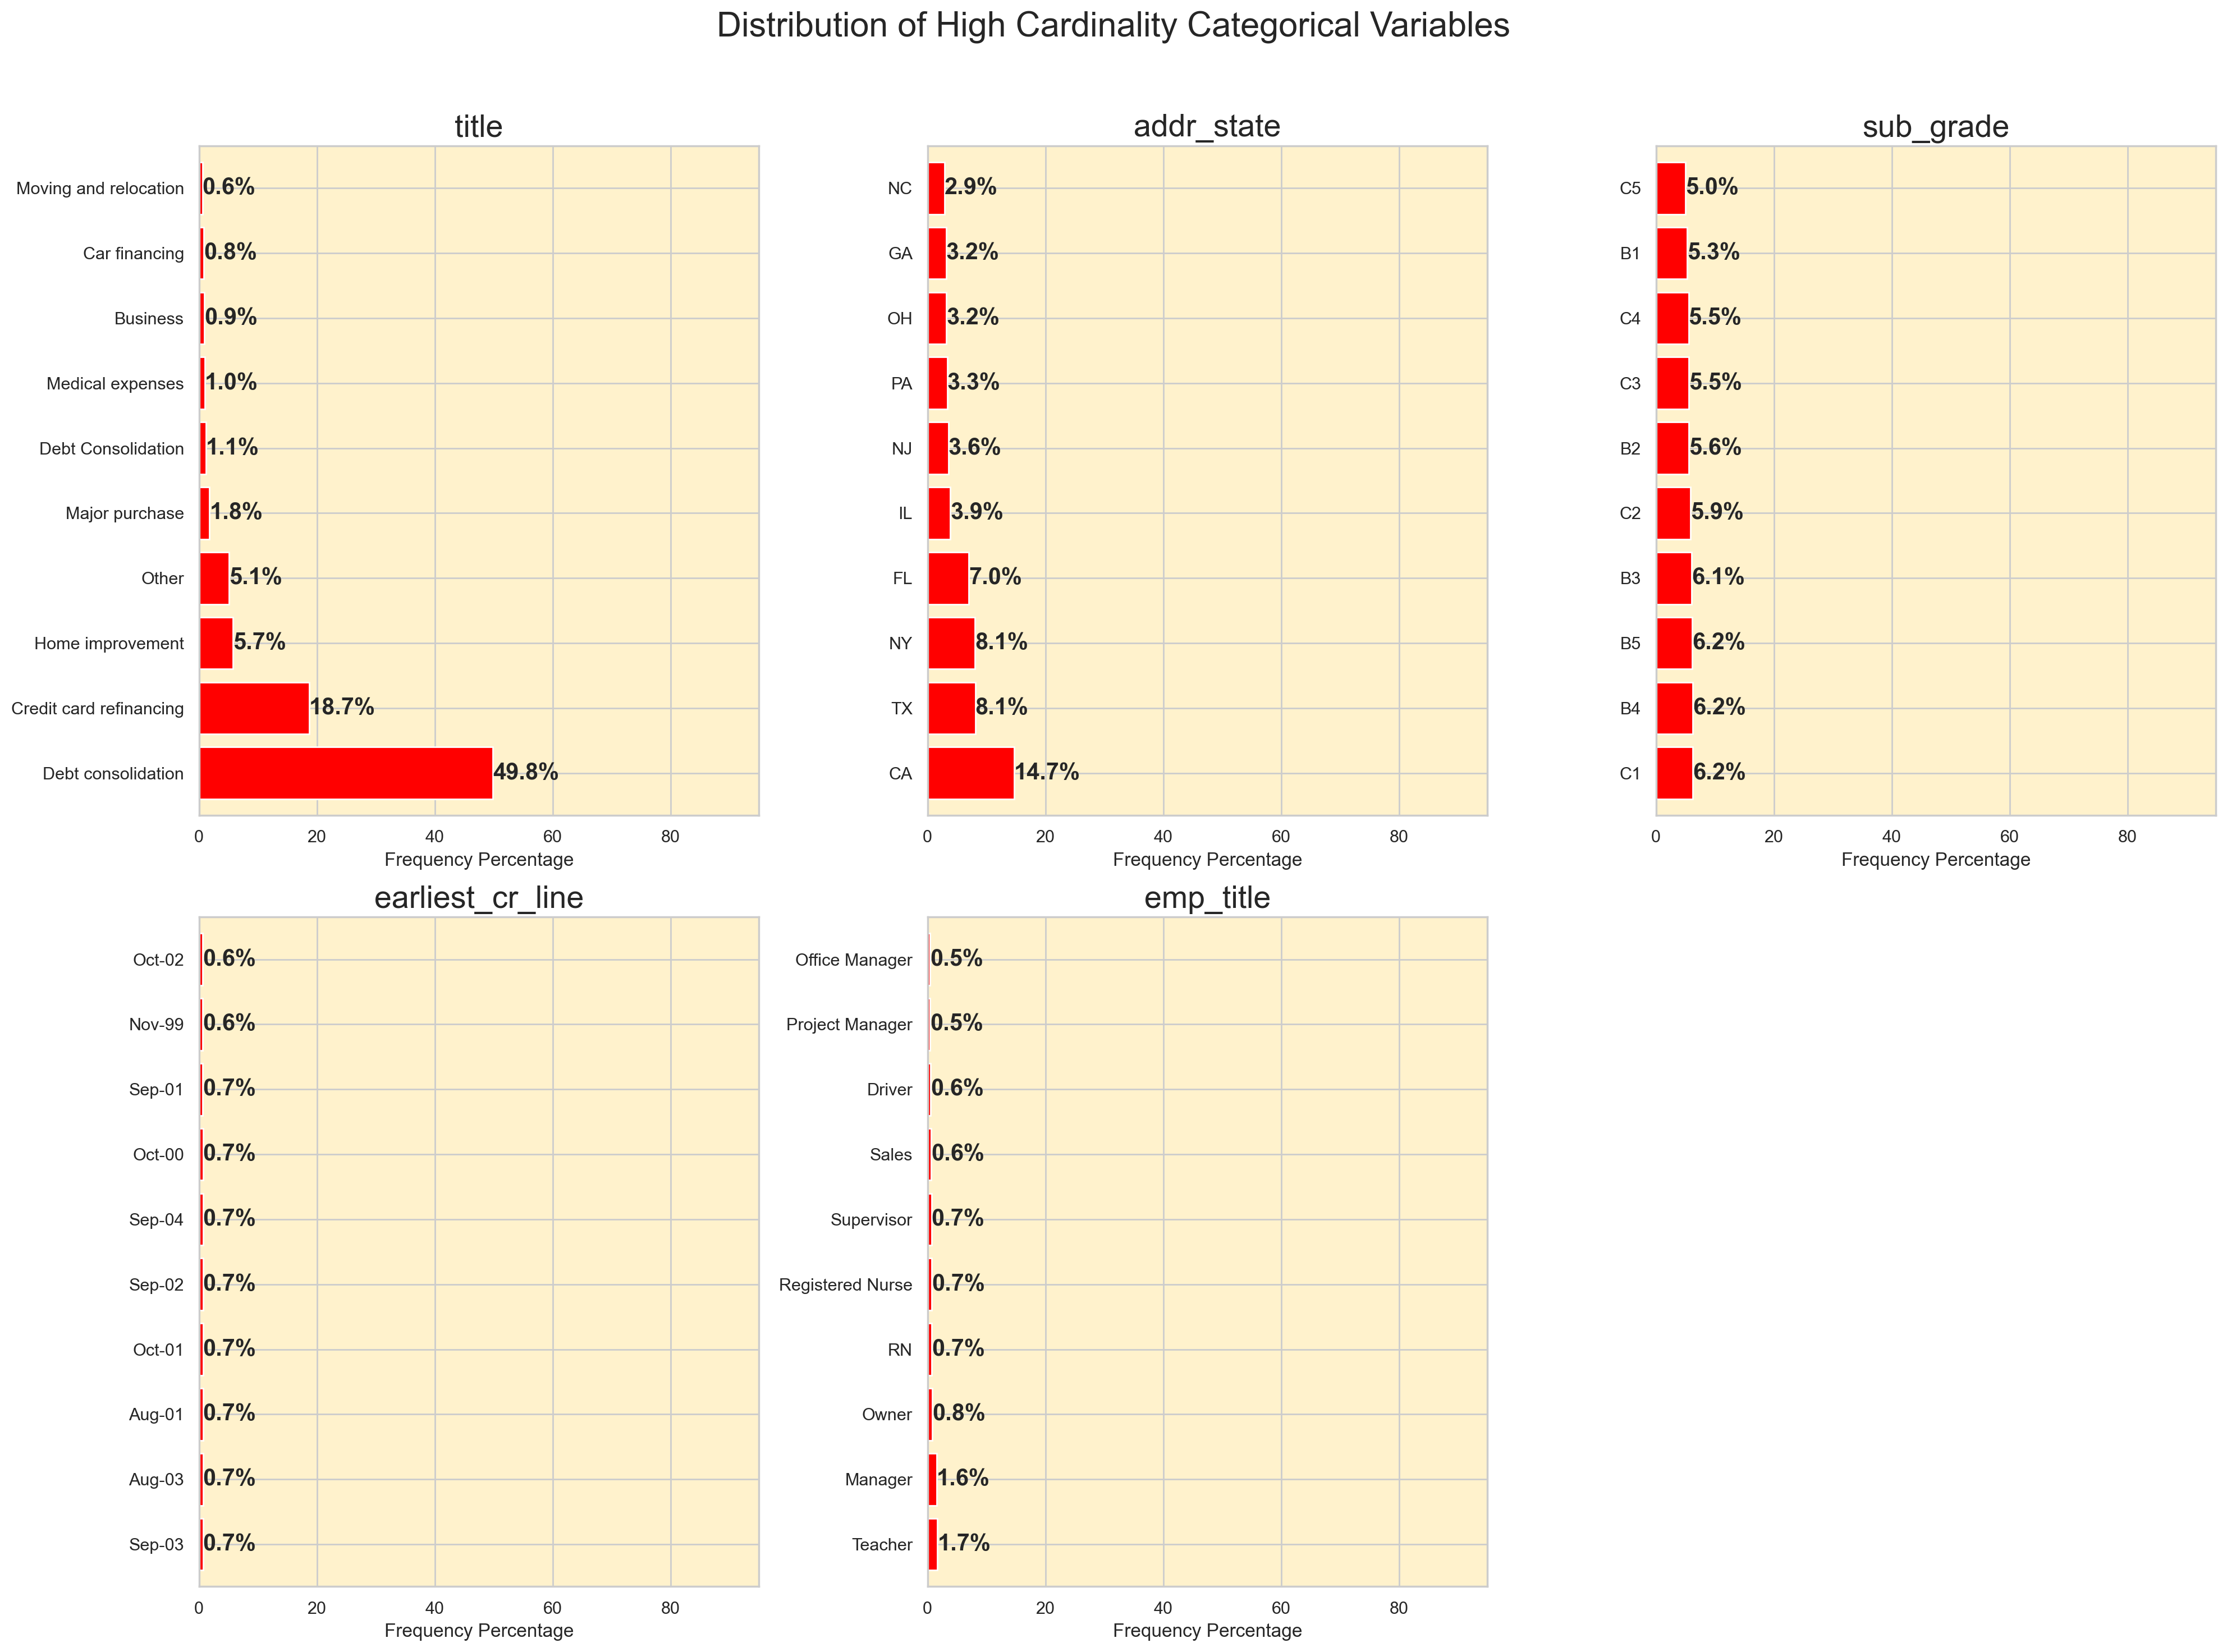

In [23]:
# Set up the subplot 
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(high_cardinality_fea):
    row = i // 3
    col_idx = i % 3
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values(ascending=False).head(10)
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[1,2].axis('off')

plt.suptitle('Distribution of High Cardinality Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">

<b>Inference</b>:<br>
<ul>
    <li><b>Sub-Grade:</b> The most prevalent sub-grade is C1, constituting 6.3% of the total, followed closely by B4 and B5, each comprising approximately 6.2% and 6.1%, respectively. Sub-grades from the 'B' and 'C' categories dominate the top positions, with slight variations in percentages</li>
    <li><b>Title:</b> The most common title for loan applications is 'Debt Consolidation', followed by 'Credit Card Refinancing', indicating that many borrowers seek loans for debt consolidation purposes or to refinance existing credit card balances.</li>
    <li><b>State:</b> The state with the highest number of loan applicants is 'CA' (California), followed by 'TX' (Texas), indicating that these states have the highest demand for loans among borrowers.</li>
    <li><b>Employment Title:</b> The most common employment title among loan applicants is 'Teacher', followed by 'Manager', suggesting that individuals in these professions are more likely to apply for loans.</li>
    <li><b>Earliest Credit Line:</b> The distribution of earliest credit line dates shows that around 0.5% of applicants have their earliest credit line in Months from August - November, indicating a common occurrence for this specific time period among loan applicants.</li>

</ul>
</div>


## 4.2: Bivariate Analysis
<a id="4.2"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
     <h3>Note 📝:</h3>
    <br>
    For bivariate analysis, we will utilize the <code>train_df</code> dataframe as the <code>test_df</code> dataframe lacks a target feature. This ensures consistency in the analysis and modeling process.

</div>


### 4.2.1: Numerical Features vs Target (loan_status)
<a id="4.2.1"></a>
 ⬆️[Table Contents](#table_content)

In [24]:
continuous_features = train_df.describe().columns
tarin_df_continuous = train_df[continuous_features]

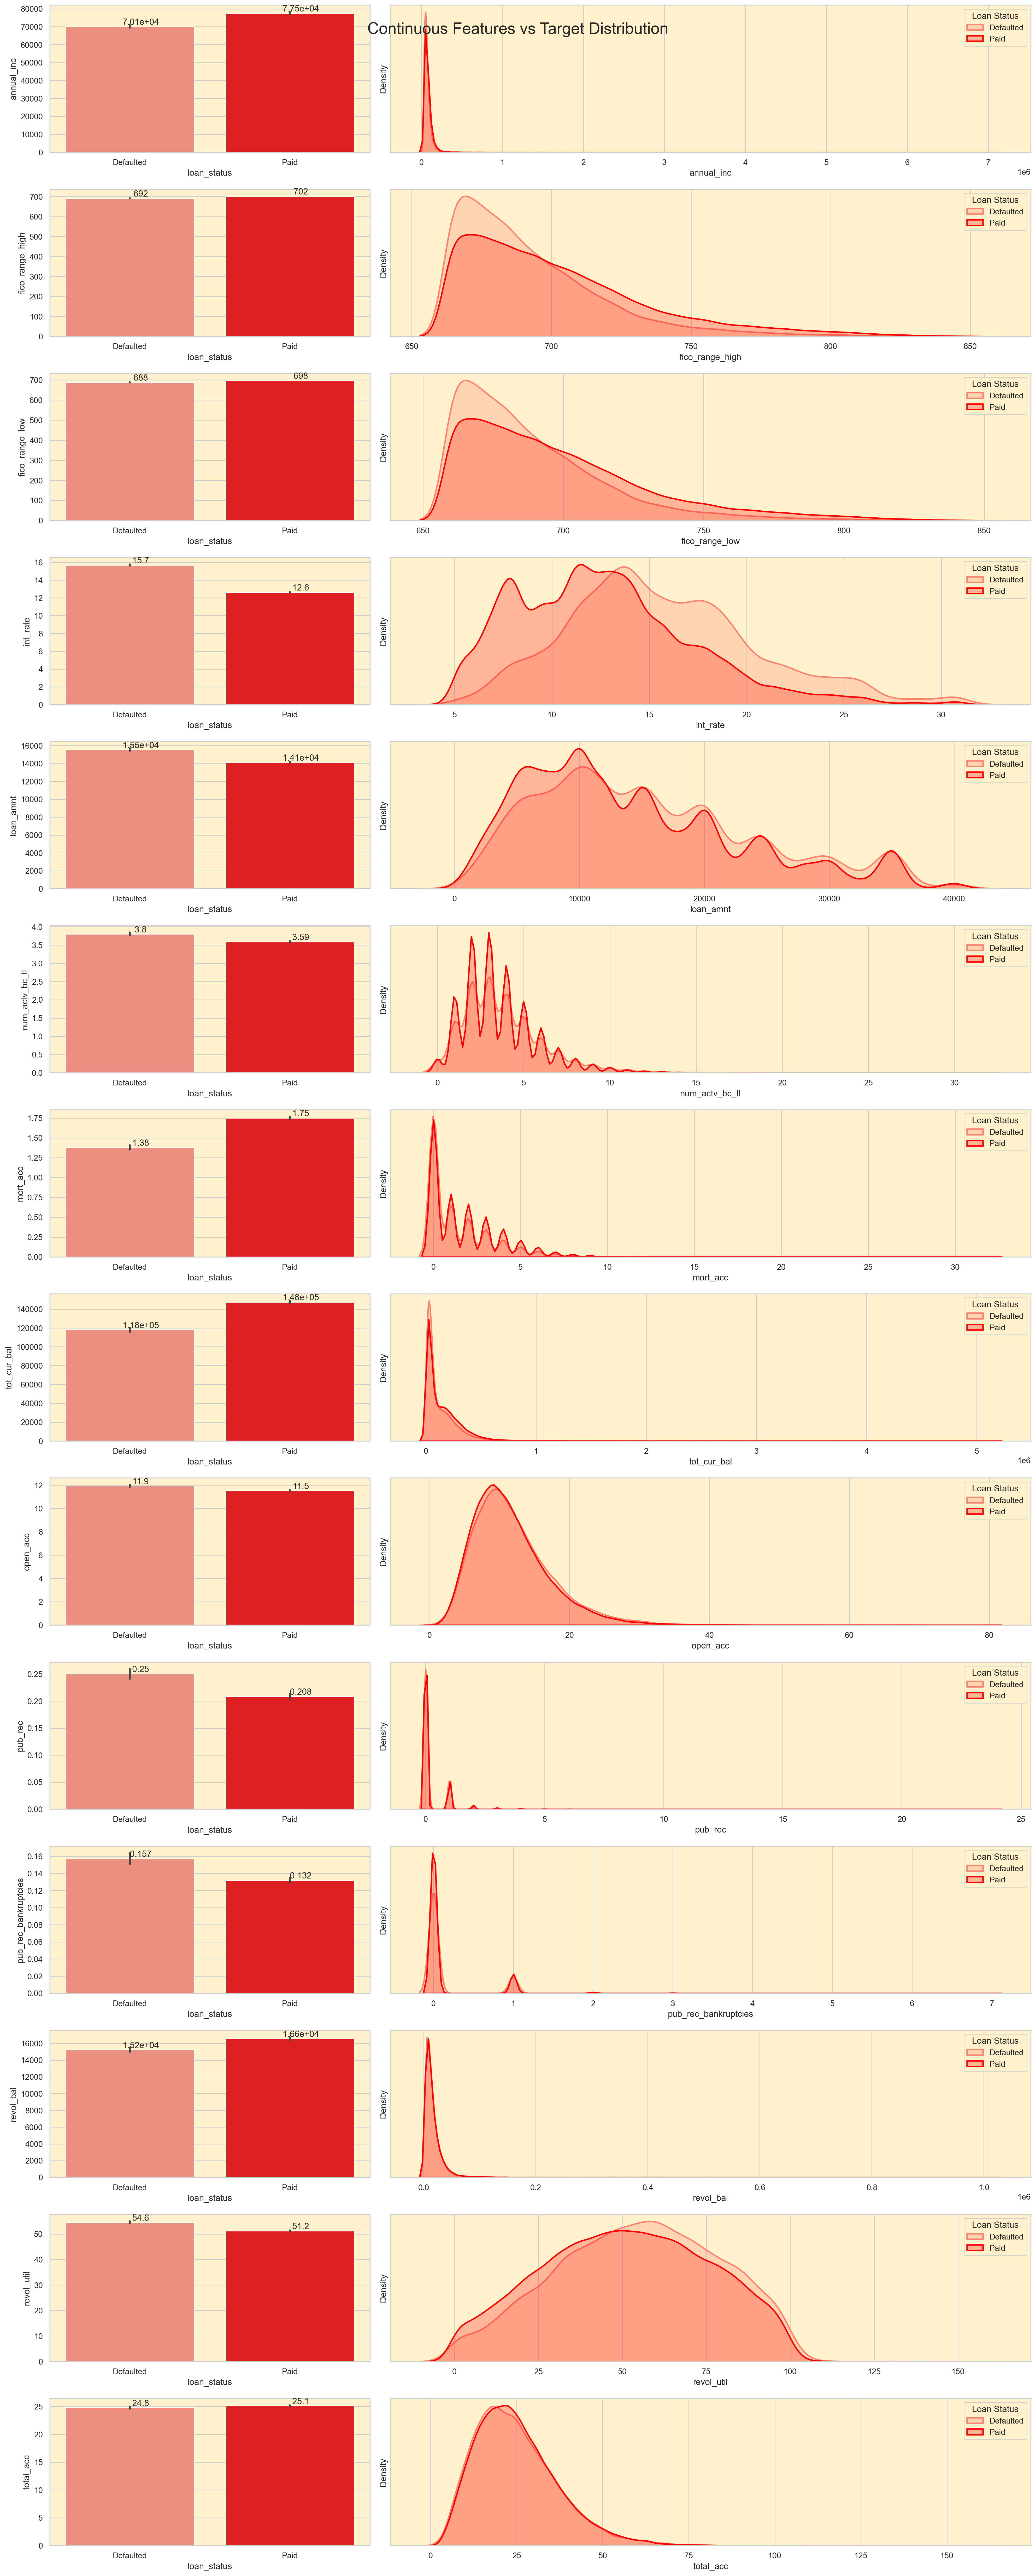

In [25]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(20,50), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=train_df, x="loan_status", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=train_df[train_df["loan_status"]=='Defaulted'], x=col, fill=True, linewidth=2, ax=ax[i,1], label='Defaulted')
    sns.kdeplot(data=train_df[train_df["loan_status"]=='Paid'], x=col, fill=True, linewidth=2, ax=ax[i,1], label='Paid')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Loan Status', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">

<b>Inference</b>:<br>
<ul>
    <li>The bivariate analysis conducted with respect to the target feature (<code>loan_status</code>) reveals notable differences in the distributions of certain continuous features between the "Paid" and "Default" categories.</li>
    <li>Features such as <b>int_rate</b>, <b>loan_amount</b>, and <b>revol_util</b> exhibit higher mean for the "Defaulted" category compared to the "paid" category.</li>
    <li>This suggests that these features may have a significant impact on the likelihood of a loan defaulting, warranting further investigation and consideration in predictive modeling and risk assessment.</li>
</ul>
    
</div>


### 4.2.2: Categorical Features vs Target (loan_status)
<a id="4.2.2"></a>
 ⬆️[Table Contents](#table_content)

#### 4.2.2.1: Low Cardinality Categorical Features vs Target (loan_status)
<a id="4.2.2.1"></a>
 ⬆️[Table Contents](#table_content)

In [26]:
# Remove 'loan_status' from the low_cardinality_features
low_cardinality_fea = [feature for feature in low_cardinality_fea if feature != 'loan_status']

low_cardinality_fea

['emp_length',
 'grade',
 'home_ownership',
 'application_type',
 'initial_list_status',
 'purpose',
 'term',
 'verification_status']

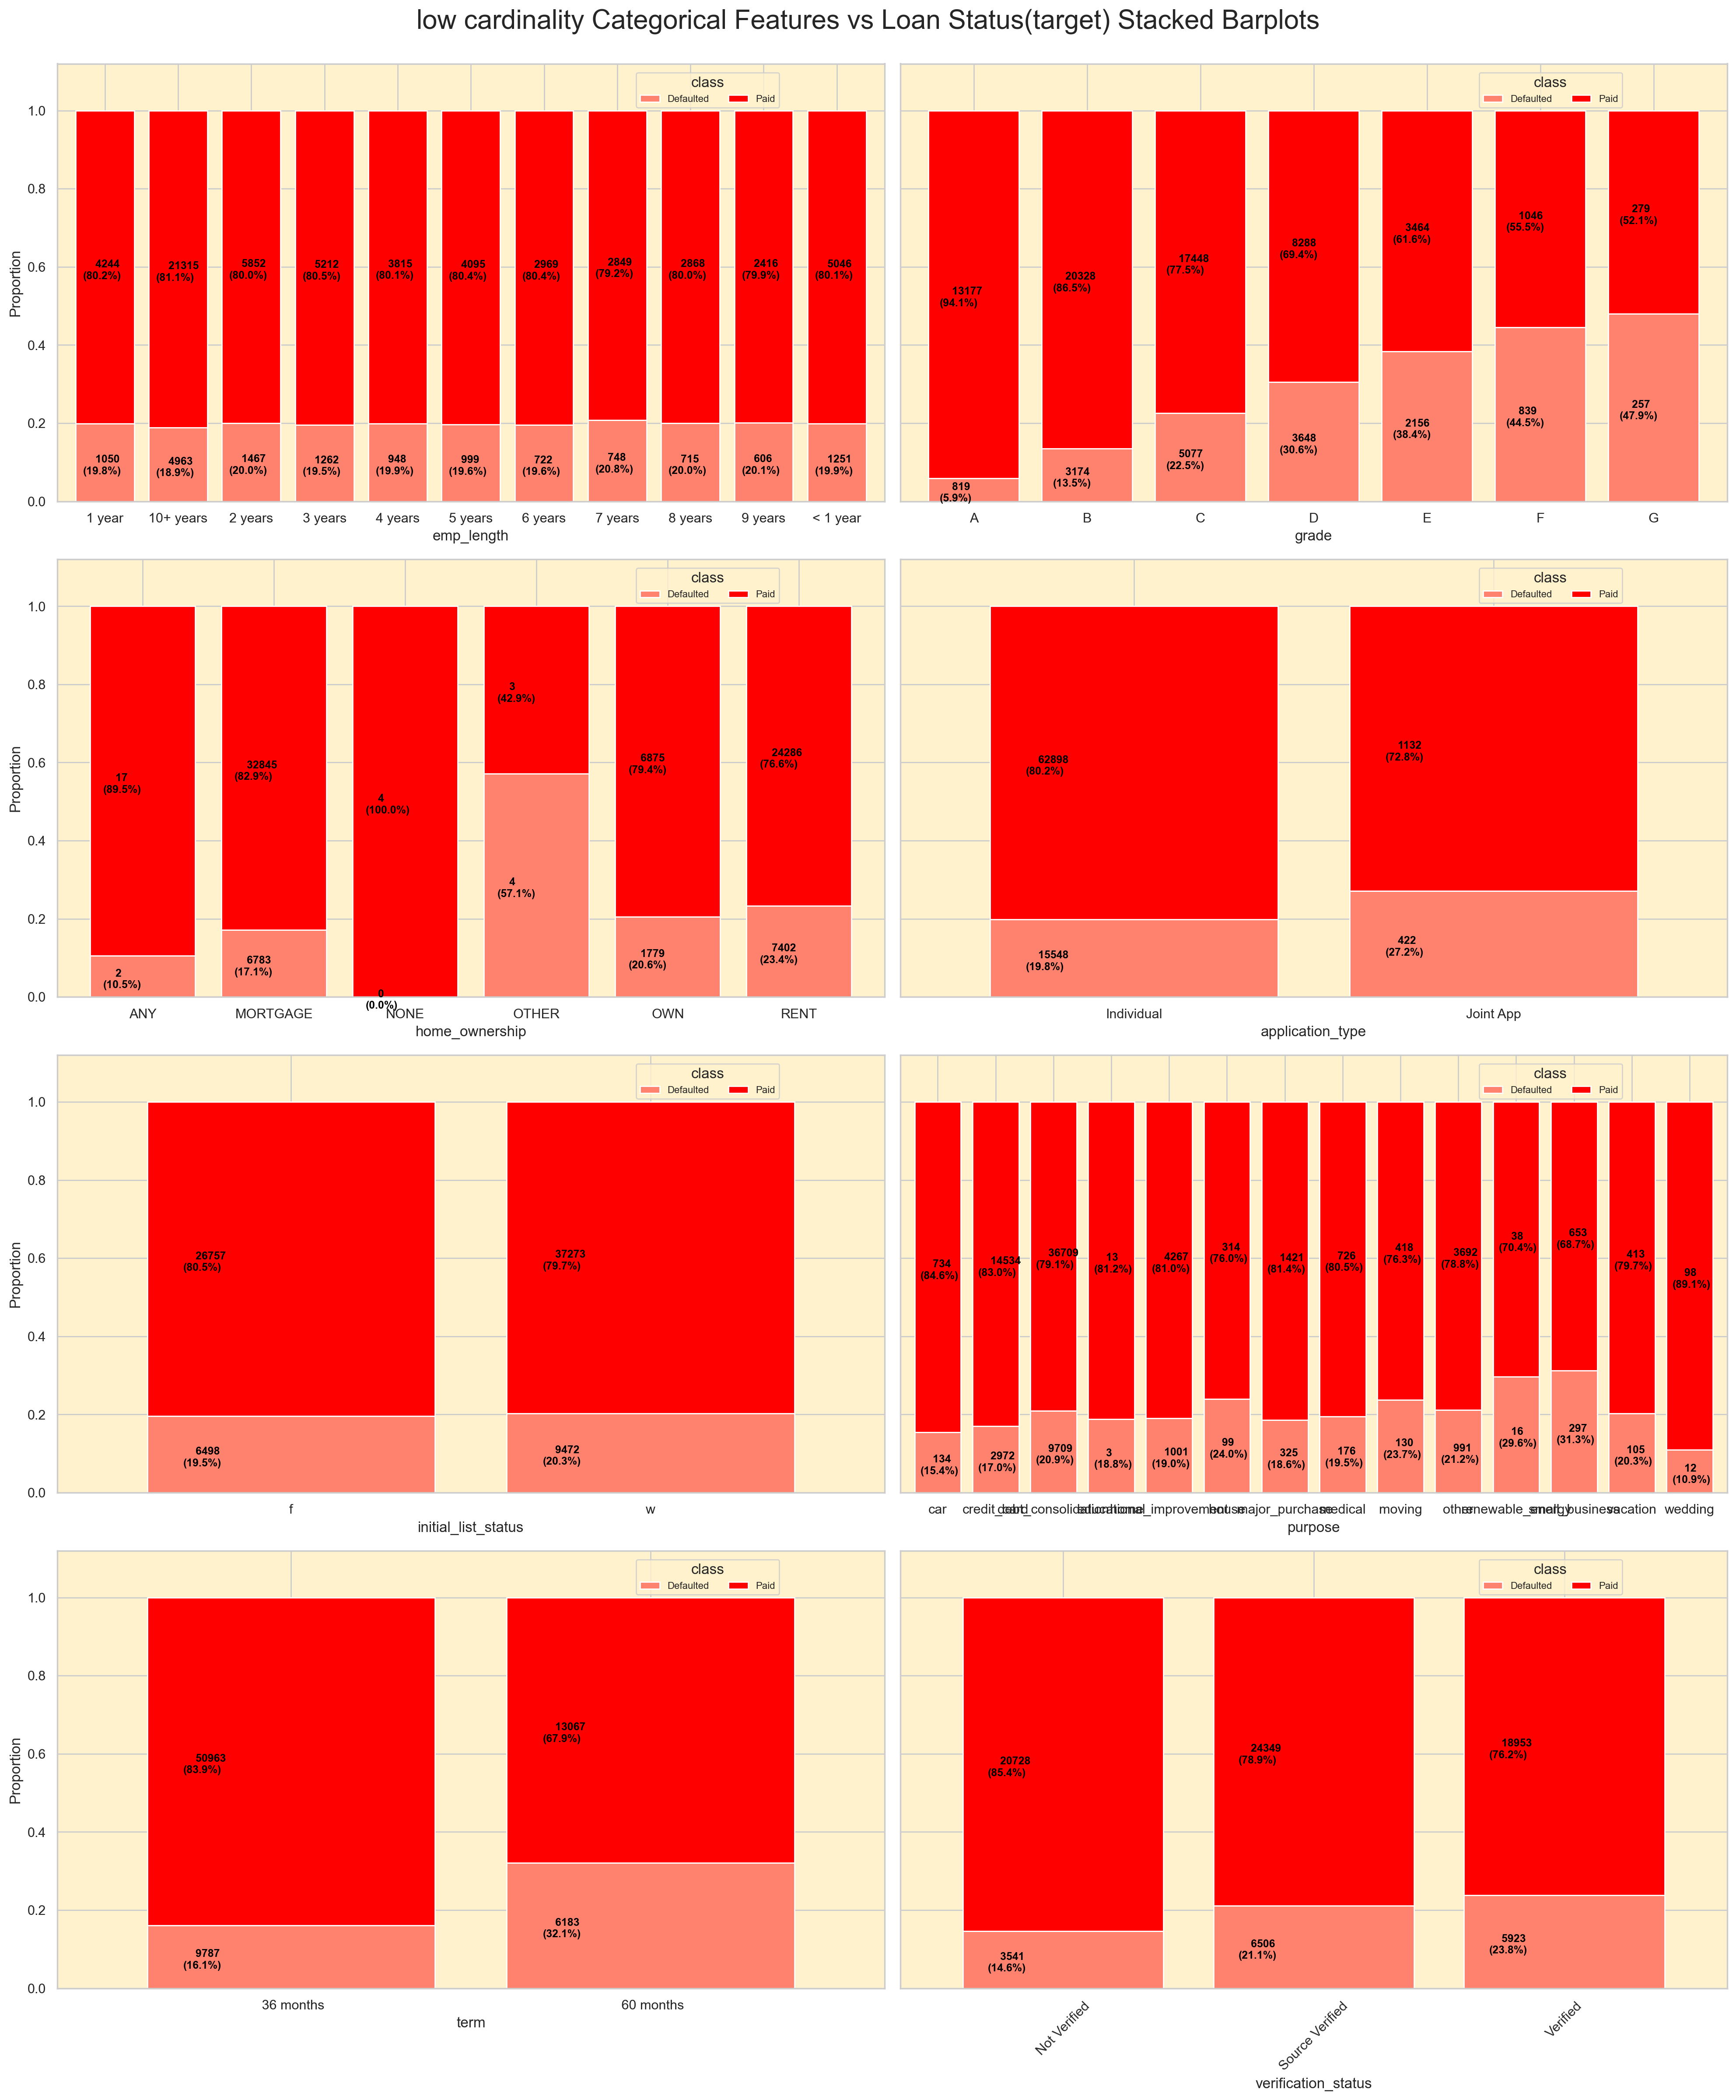

In [27]:
# Calculate the number of required subplots
num_plots = len(low_cardinality_fea)
num_rows = (num_plots) // 2  # Add one extra row if the number of plots is odd

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, num_rows * 6))

for i, col in enumerate(low_cardinality_fea):
    # Calculate the row and column index
    x, y = i // 2, i % 2
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=train_df[col], columns=train_df['loan_status'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=train_df[col], columns=train_df['loan_status'], normalize='index')   
    
    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x, y].legend(title='class', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x, y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)
    
ax[3, 1].set_xticklabels(ax[3, 1].get_xticklabels(), rotation=45)   
# Remove empty subplot if the number of plots is odd
if num_plots % 2 != 0:
    fig.delaxes(ax[num_rows-1, 1])
    
# Set title outside the subplots
plt.suptitle('low cardinality Categorical Features vs Loan Status(target) Stacked Barplots', fontsize=22, y=0.999)
plt.tight_layout()                     
plt.show()


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">

<b>Inference</b>:<br>
<ul>
    <li><b>Employment Length (emp_length):</b> The proportion of loan status is relatively consistent across different employment lengths. No significant variation suggests that employment length alone does not strongly indicate loan status.</li>
    <li><b>Loan Grades (grade):</b> Lower grades (A and B) have a higher proportion of 'good' loan status, whereas higher grades (F and G) show a larger proportion of 'bad' loan status. This implies that loan grade may be an indicator of loan status, with lower grades associated with better loan performance.</li>
    <li><b>Home Ownership:</b> Applicants who own their homes or have mortgages tend to have a slightly higher proportion of 'good' loan status compared to those who rent or have other arrangements. This might suggest that home ownership is a positive factor in loan repayment.</li>
    <li><b>Application Type:</b> Individual applications have a higher proportion of 'good' loan status compared to joint applications. This may imply that individual applicants are less risky than joint applicants.</li>
    <li><b>Initial List Status (init_list_status):</b> There seems to be a slightly higher proportion of 'good' loan status for loans with an initial listing status of 'w' compared to 'f'. The difference is not stark but may still be significant.</li>
    <li><b>Loan Purpose:</b> Different purposes show different proportions of loan status, with purposes like 'credit_card' and 'debt_consolidation' showing a higher proportion of 'good' status. In contrast, 'small_business' has a higher incidence of 'bad' status, indicating that loans for small business purposes may carry higher risk.</li>
    <li><b>Term:</b> Shorter loan terms (36 months) are associated with a higher proportion of 'good' loan status, while longer terms (60 months) have a higher proportion of 'bad' loan status, suggesting that longer-term loans might be riskier.</li>
    <li><b>Verification Status:</b> Loans with verified income status have a higher proportion of 'bad' loan status compared to those with non-verified status. This is counterintuitive as one might expect verified income to correlate with a lower risk of default.</li>
</ul>

    
</div>

#### 4.2.2.2: High Cardinality Categorical Features vs Target (loan_status)
<a id="4.2.2.2"></a>
 ⬆️[Table Contents](#table_content)

In [28]:
high_cardinality_fea

['title', 'addr_state', 'sub_grade', 'earliest_cr_line', 'emp_title']

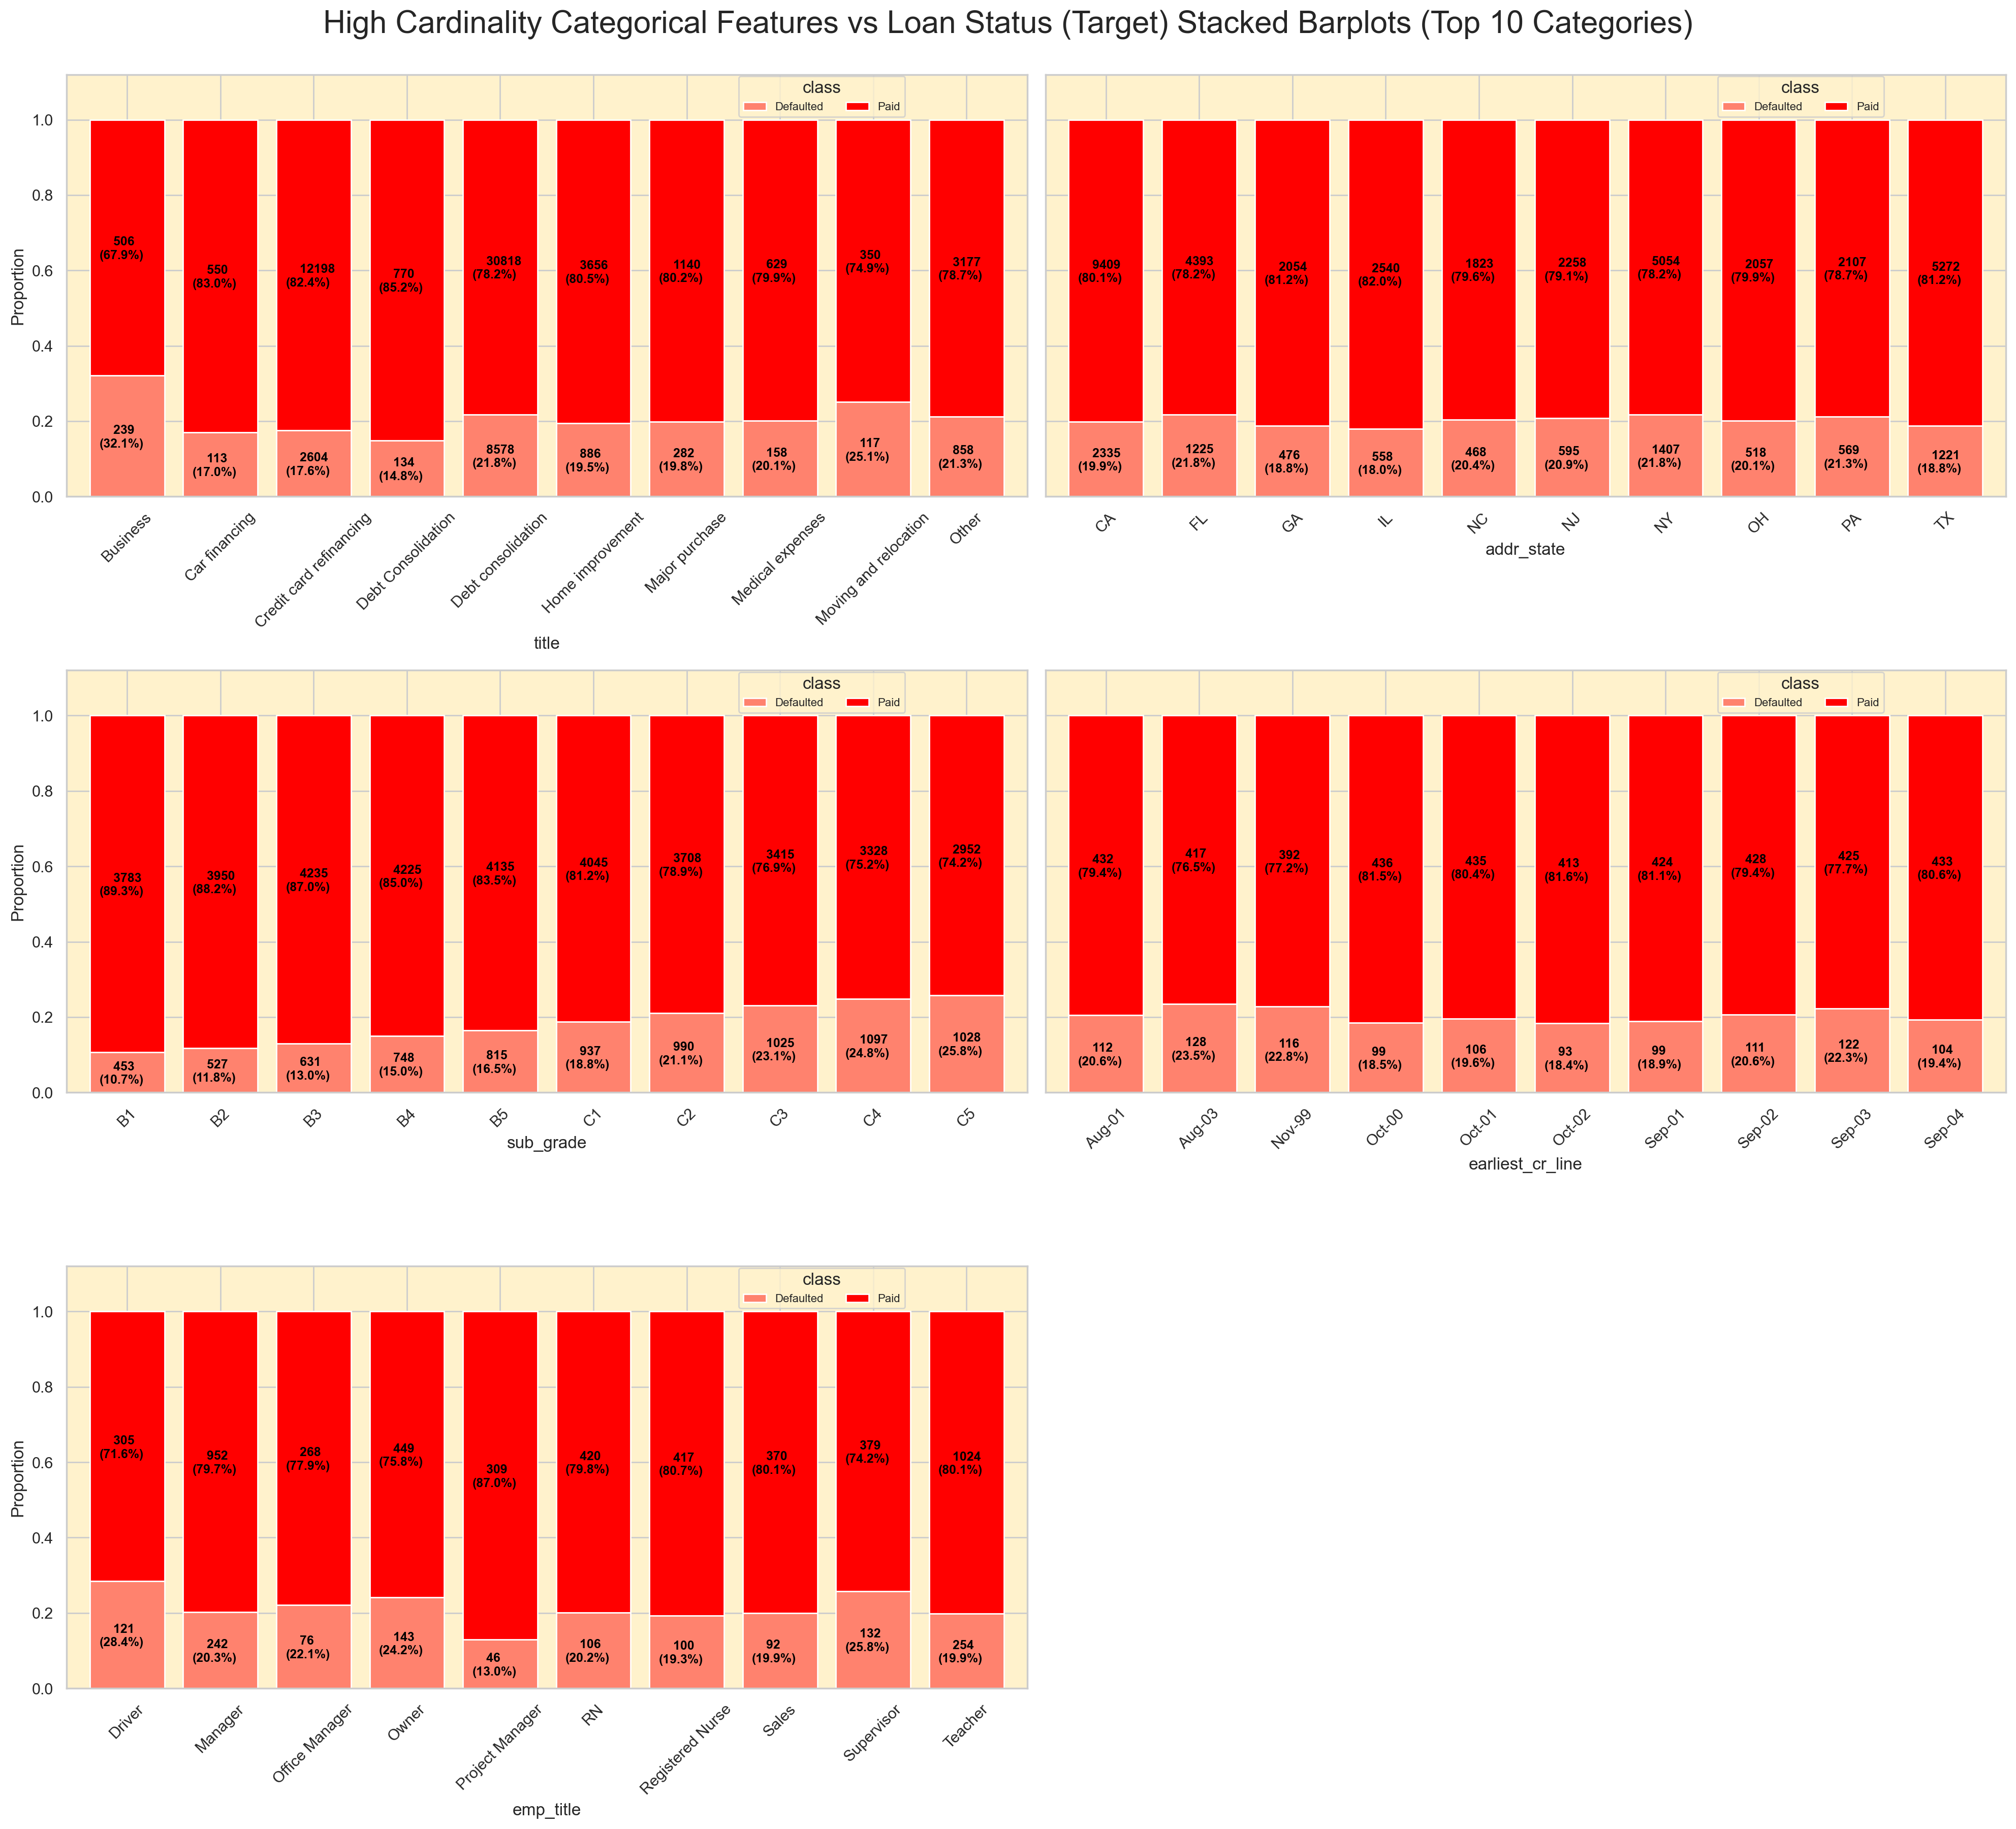

In [29]:
# Calculate the number of required subplots
num_plots = len(high_cardinality_fea)
num_rows = (num_plots + 1) // 2  # Add one extra row if the number of plots is odd

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, num_rows * 6))

for i, col in enumerate(high_cardinality_fea):
    # Calculate the row and column index
    x, y = i // 2, i % 2
    
    # Get the top 10 most occurring categories
    top_categories = train_df[col].value_counts().head(10).index
    
    # Subset the dataframe to include only the top 10 categories
    subset_df = train_df[train_df[col].isin(top_categories)]
    
    # Create a cross tabulation showing the proportion of loan statuses for each category of the feature
    cross_tab = pd.crosstab(index=subset_df[col], columns=subset_df['loan_status'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=subset_df[col], columns=subset_df['loan_status'], normalize='index')   
    
    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x, y].legend(title='class', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x, y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=45)
    
# Remove empty subplot if the number of plots is odd
if num_plots % 2 != 0:
    fig.delaxes(ax[num_rows-1, 1])
    
# Set title outside the subplots
plt.suptitle('High Cardinality Categorical Features vs Loan Status (Target) Stacked Barplots (Top 10 Categories)', fontsize=22, y=0.999)
plt.tight_layout()                     
plt.show()


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">

<b>Inference</b>:<br>
<ul>
    <li><b>Subgrade:</b> The 'good' versus 'bad' loan status ratio varies across different subgrades, with higher subgrades (A1, A2, etc.) showing a greater proportion of 'good' status and lower subgrades (like G5) showing a larger proportion of 'bad' status. This indicates that subgrade is a potentially strong predictor of loan performance.</li>
    <li><b>Earliest Credit Line (earliest_cr_line):</b> The distribution across different years shows some variation in the proportion of loan status. Some years have a higher incidence of 'bad' loan status, which may reflect economic cycles or changes in lending practices over time.</li>
    <li><b>Job Title (emp_title):</b> There is a noticeable difference in loan status proportions among different job titles. Some job titles show a higher proportion of 'good' loan status, which suggests that the borrower's profession could influence the likelihood of loan repayment.</li>
    <li><b>State (addr_state):</b> The loan status proportions differ across states, indicating that geographic location may impact loan performance. Some states have a higher ratio of 'good' loan status, while others have a greater proportion of 'bad' loan status.</li>
</ul>

    
</div>

# <p id="2" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #90CDF4; font-size: 16px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">5: Data Preprocessing</p>
<a id="5"></a>
 ⬆️[Table Contents](#table_content)

# 5.1: Feature Engineering
<a id="5.1"></a>
 ⬆️[Table Contents](#table_content)

## 5.1.1: High Cardinal Categorical Features
<a id="5.1.1"></a>
 ⬆️[Table Contents](#table_content)

In [30]:
# Create a dataframe with the number of unique categories and missing values for each high-cardinality feature
high_cardinality_features = high_cardinality_fea
unique_categories = train_df[high_cardinality_features].nunique()
missing_values = train_df[high_cardinality_features].isnull().sum()

# Combine the two series into a single dataframe
high_cardinality_df = pd.DataFrame({'Unique_Categories': unique_categories, 'Missing_Values': missing_values})

high_cardinality_df

Unique_Categories  Missing_Values
title                          5348             970
addr_state                       51               0
sub_grade                        35               0
earliest_cr_line                640               0
emp_title                     36661            5018

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">

<b>Feature Engineering Actions:</b><br>
<ul>
    <li><b>Address State (addr_state):</b> Grouping the states of the USA into regions to provide a more generalized view of geographical location.</li>
    <li><b>Earliest Credit Line (earliest_cr_line):</b> Converting categories into datetime format to simplify the data while retaining temporal information.</li>
    <li><b>Employment Title (emp_title):</b> Removing this feature due to the large number of categories. However, it can be grouped into common domain roles or only the top N most frequent roles can be retained, with the rest grouped into an 'Other' category if needed in future work.</li>
    <li><b>Sub Grade (sub_grade):</b> Dropping this feature as it is directly related to the grade feature, making it redundant and increasing data dimensionality.</li>
    <li><b>Title:</b> Dropping this feature as it is directly related to the purpose feature, which would increase data dimensionality.</li>
       
</ul>

<p>By performing these feature engineering actions, we aim to simplify the dataset while retaining important information relevant to the loan domain. This will help in reducing the dimensionality of the data and improving the efficiency of subsequent analysis and modeling.</p>
</div>


### addr_state

In [31]:
# Define mapping of states to regions
state_to_region = {
    'CT': 'Northeast',
    'ME': 'Northeast',
    'MA': 'Northeast',
    'NH': 'Northeast',
    'RI': 'Northeast',
    'VT': 'Northeast',
    'NJ': 'Northeast',
    'NY': 'Northeast',
    'PA': 'Northeast',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'MI': 'Midwest',
    'OH': 'Midwest',
    'WI': 'Midwest',
    'IA': 'Midwest',
    'KS': 'Midwest',
    'MN': 'Midwest',
    'MO': 'Midwest',
    'NE': 'Midwest',
    'ND': 'Midwest',
    'SD': 'Midwest',
    'DE': 'South',
    'FL': 'South',
    'GA': 'South',
    'MD': 'South',
    'NC': 'South',
    'SC': 'South',
    'VA': 'South',
    'DC': 'South',
    'WV': 'South',
    'AL': 'South',
    'KY': 'South',
    'MS': 'South',
    'TN': 'South',
    'AR': 'South',
    'LA': 'South',
    'OK': 'South',
    'TX': 'South',
    'AZ': 'West',
    'CO': 'West',
    'ID': 'West',
    'MT': 'West',
    'NV': 'West',
    'NM': 'West',
    'UT': 'West',
    'WY': 'West',
    'AK': 'West',
    'CA': 'West',
    'HI': 'West',
    'OR': 'West',
    'WA': 'West'
}

# Map states to regions and drop addr_state column
train_df['region'] = train_df['addr_state'].map(state_to_region)
train_df.drop(columns=['addr_state'], inplace=True)

test_df['region'] = test_df['addr_state'].map(state_to_region)
test_df.drop(columns=['addr_state'], inplace=True)

### earliest_cr_line

In [32]:
train_df.drop(columns=['earliest_cr_line'],axis=1, inplace=True)
test_df.drop(columns=['earliest_cr_line'],axis=1, inplace=True)

### sub_grade, title, emp_title

In [33]:
train_df.drop(columns=['sub_grade','title','emp_title'],axis=1, inplace=True)
test_df.drop(columns=['sub_grade','title','emp_title'],axis=1, inplace=True)

## 5.1.2: Low Cardinal Categorical Features
<a id="5.1.2"></a>
 ⬆️[Table Contents](#table_content)

In [34]:
low_cardinality_fea

['emp_length',
 'grade',
 'home_ownership',
 'application_type',
 'initial_list_status',
 'purpose',
 'term',
 'verification_status']

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
<b>Feature Engineering Actions:</b><br>

<ul>
    <li><b>home_ownership:</b> We notice a direct association between the "NONE" category and the "paid" category in the target feature. To address this, we will group "NONE," "ANY," and "OTHER" into an "Other" category.</li>
    <li><b>term:</b> We observe two unique categories: 36 months and 60 months. To align with its semantics, we will convert this feature into numeric values representing the respective term lengths.</li>
    <li><b>emp_length:</b> 
Based on bivariate analysis, emp_length exhibits significant bias towards the "paid" category in the target feature. Consequently, we opt to drop this feature. However, we may consider grouping it into "< 1 year" and "10+ years" for future analysis, pending discussion with business stakeholders regarding its relevance in the loan domain.</li>
    <li><b>purpose:</b> We will group the categories based on their specific domain knowledge and requirements.</li>
</ul>
<p>By performing these feature engineering actions, we aim to simplify the dataset while retaining important information relevant to the loan domain. This will help in reducing the dimensionality of the data and improving the efficiency of subsequent analysis and modeling.</p>
</div>

### home_ownership

In [35]:
train_df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [36]:
train_df['home_ownership'] = train_df['home_ownership'].replace(['ANY', 'NONE', 'OTHER'], 'Other')
test_df['home_ownership'] = test_df['home_ownership'].replace(['ANY', 'NONE', 'OTHER'], 'Other')

### term

In [37]:
train_df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [38]:
train_df['term'] = train_df['term'].str.strip()
test_df['term'] = test_df['term'].str.strip()

In [39]:
# Define the mapping
term_mapping = {'36 months': 36, '60 months': 60}

# Apply the mapping using the replace function
train_df['term'] = train_df['term'].replace(term_mapping)
test_df['term'] = test_df['term'].replace(term_mapping)

### purpose

In [40]:
train_df['purpose'].value_counts()

debt_consolidation    46418
credit_card           17506
home_improvement       5268
other                  4683
major_purchase         1746
small_business          950
medical                 902
car                     868
moving                  548
vacation                518
house                   413
wedding                 110
renewable_energy         54
educational              16
Name: purpose, dtype: int64

In [41]:
# Map similar categories to new categories
category_mapping = {
    'credit_related': ['credit_card', 'debt_consolidation'],
    'specific_purpose': ['car', 'home_improvement', 'major_purchase', 'medical', 'house'],
    'education_and_personal': ['educational', 'wedding', 'vacation', 'moving'],
    'business': ['small_business'],
    'other': ['renewable_energy', 'other']
}


# Function to map loan purpose to broad category
def map_purpose_to_category(purpose):
    for category, purposes in category_mapping.items():
        if purpose in purposes:
            return category
    return 'Unknown'  # Default category if purpose doesn't match any


In [42]:
train_df['purpose_category'] = train_df['purpose'].map(map_purpose_to_category)

In [43]:
test_df['purpose_category'] = test_df['purpose'].map(map_purpose_to_category)

In [44]:
train_df.drop('purpose', axis=1, inplace=True)
test_df.drop('purpose', axis=1, inplace=True)

### emp_length 

In [45]:
# Map similar categories to new categories
emp_length_mapping = {
    '10+ years': 10,
    '2 years': 2,
    '3 years': 3,
    '< 1 year': 0,
    '1 year': 1,
    '5 years':5,
    '4 years':4,
    '6 years':6,
    '7 years':7,
    '8 years':8,
    '9 years':9  
}

# Apply the mapping using the replace function
train_df['emp_length'] = train_df['emp_length'].replace(emp_length_mapping)
test_df['emp_length'] = test_df['emp_length'].replace(emp_length_mapping)

## 5.2: Handle Missing Values

In [46]:
train_df.dtypes

annual_inc              float64
emp_length              float64
fico_range_high           int64
fico_range_low            int64
grade                    object
home_ownership           object
application_type         object
initial_list_status      object
int_rate                float64
loan_amnt                 int64
num_actv_bc_tl          float64
mort_acc                float64
tot_cur_bal             float64
open_acc                  int64
pub_rec                   int64
pub_rec_bankruptcies    float64
revol_bal                 int64
revol_util              float64
term                      int64
total_acc                 int64
verification_status      object
loan_status              object
region                   object
purpose_category         object
dtype: object

In [47]:
# Training dataset
missing_values_percentage = (train_df.isnull().sum() / len(train_df)) * 100
missing_values_percentage[missing_values_percentage > 0]

emp_length              5.73500
num_actv_bc_tl          4.93500
mort_acc                3.46375
tot_cur_bal             4.93500
pub_rec_bankruptcies    0.03875
revol_util              0.06625
dtype: float64

In [48]:
# Test dataset
missing_values_percentage = (test_df.isnull().sum() / len(test_df)) * 100
missing_values_percentage[missing_values_percentage > 0]

emp_length              6.290
num_actv_bc_tl          5.055
mort_acc                3.520
tot_cur_bal             5.055
pub_rec_bankruptcies    0.055
revol_util              0.065
dtype: float64

### num_actv_bc_tl

In [49]:
train_df['num_actv_bc_tl'].fillna(0, inplace=True)
test_df['num_actv_bc_tl'].fillna(0, inplace=True)

In [50]:
mean_num_actv_bc_tl = train_df['num_actv_bc_tl'].mean()

In [51]:
# Fill missing values with the calculated mean
train_df['num_actv_bc_tl'].fillna(mean_num_actv_bc_tl, inplace=True)

mean_num_actv_bc_tl2 = test_df['num_actv_bc_tl'].mean()
test_df['num_actv_bc_tl'].fillna(mean_num_actv_bc_tl2, inplace=True)

### tot_cur_bal

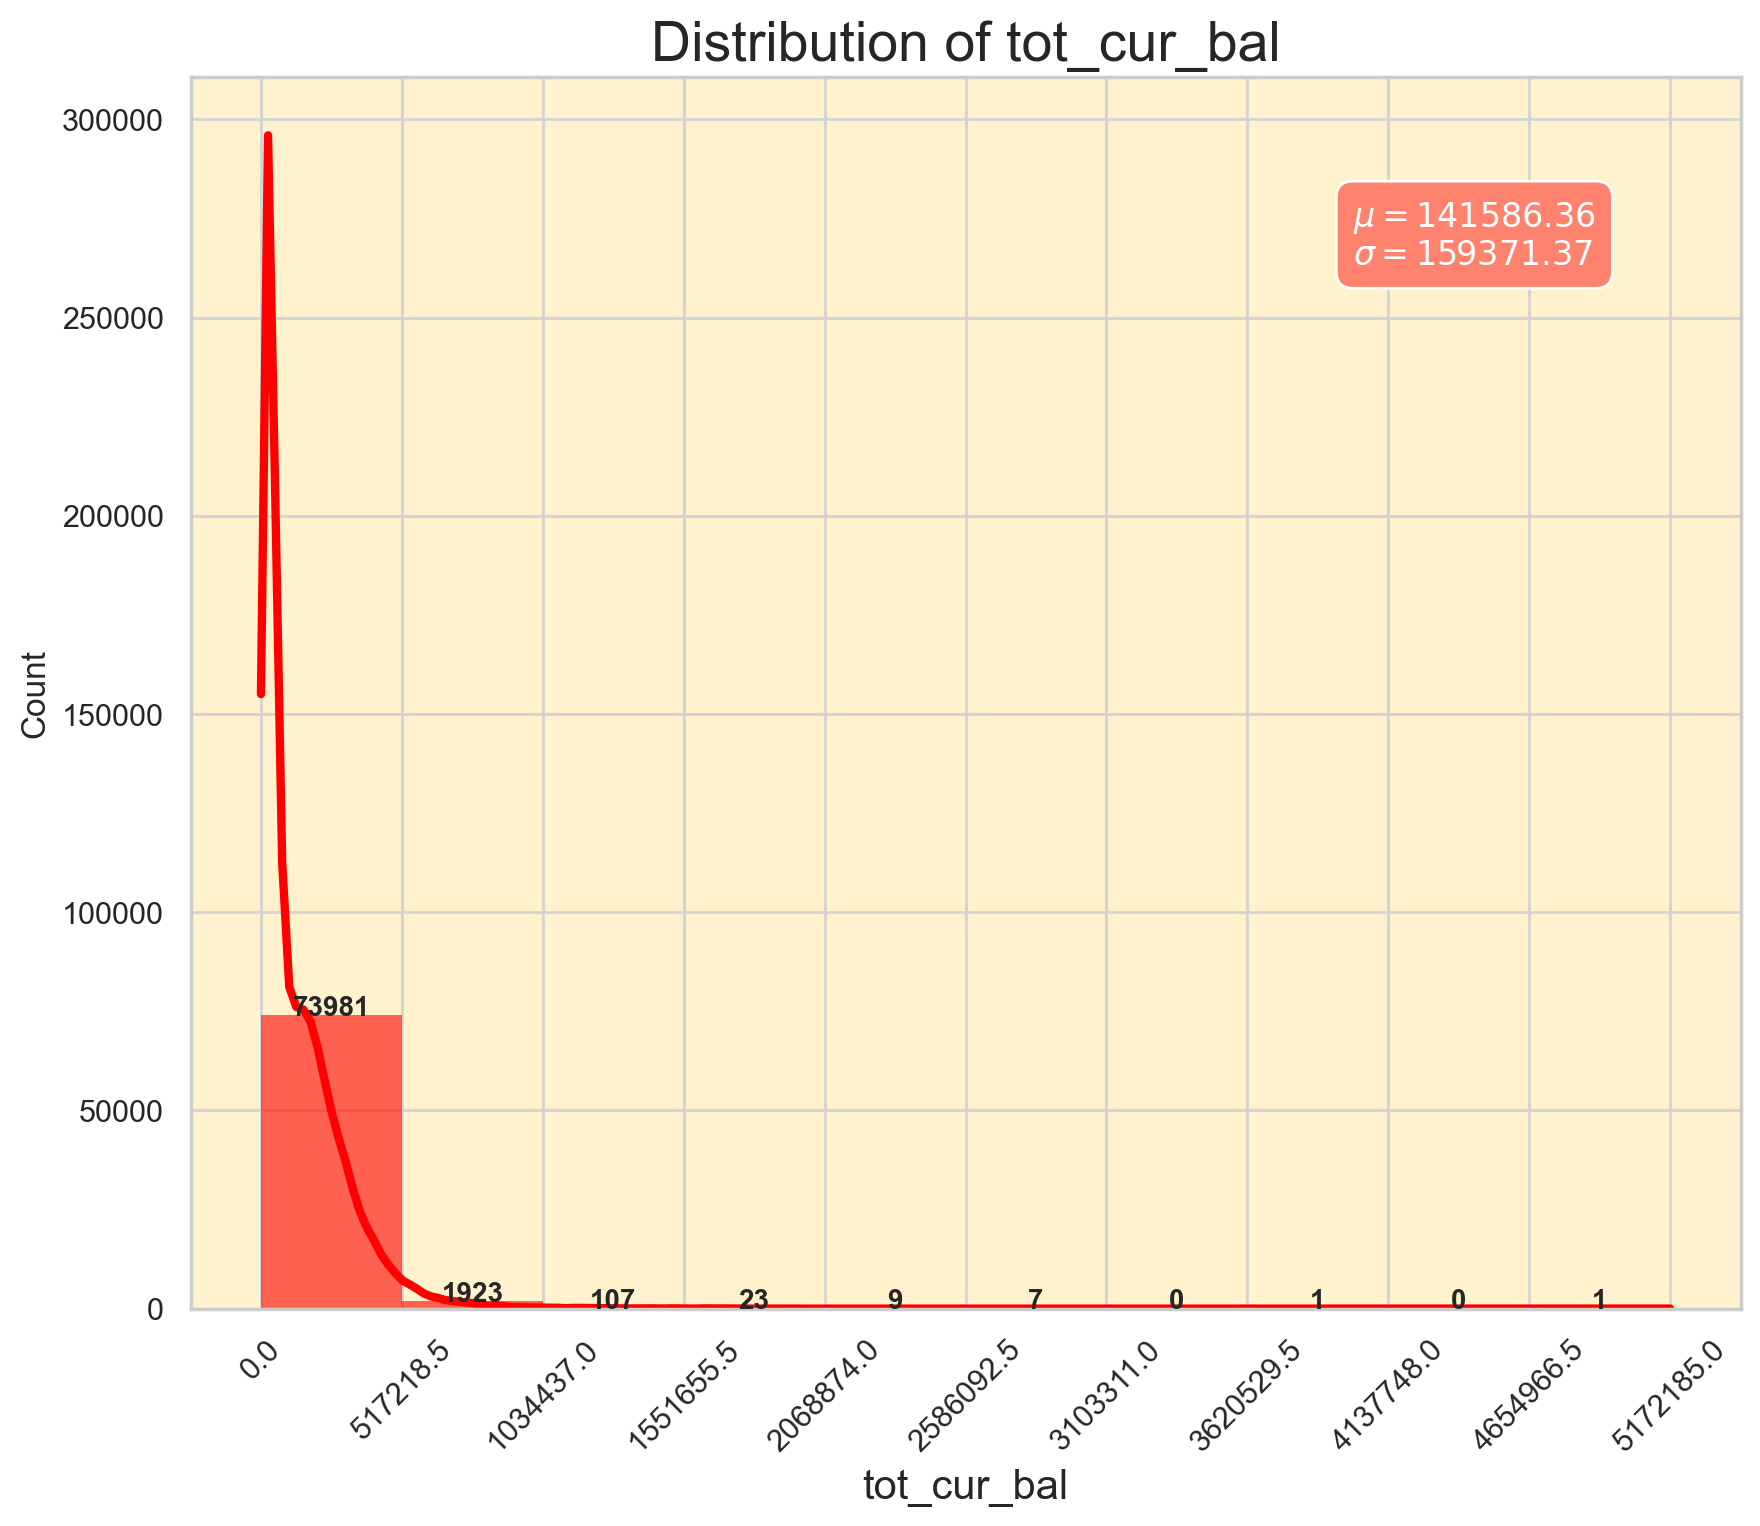

In [52]:
col = 'tot_cur_bal'

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the histogram
values, bin_edges = np.histogram(train_df[col], 
                                 range=(np.floor(train_df[col].min()), np.ceil(train_df[col].max())))
graph = sns.histplot(data=train_df, x=col, bins=bin_edges, kde=True, ax=ax,
                     edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
ax.set_xlabel(col, fontsize=15)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(np.round(bin_edges, 1))
ax.set_xticklabels(ax.get_xticks(), rotation=45)
ax.grid(color='lightgrey')

# Annotate each bar with its count
for j, p in enumerate(graph.patches):
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha='center', fontsize=10, fontweight="bold")

# Add text box with mean and standard deviation
textstr = '\n'.join((
    r'$\mu=%.2f$' % df_continuous[col].mean(),
    r'$\sigma=%.2f$' % df_continuous[col].std()
))
ax.text(0.75, 0.9, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top',
        color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Set the title
plt.title(f'Distribution of {col}', fontsize=20)

# Show the plot
plt.show()


In [53]:
median_tot_cur_bal = train_df['tot_cur_bal'].median()

In [54]:
# Fill missing values with the calculated median
train_df['tot_cur_bal'].fillna(median_tot_cur_bal, inplace=True)

In [55]:
median_tot_cur_bal = test_df['tot_cur_bal'].median()
test_df['tot_cur_bal'].fillna(median_tot_cur_bal, inplace=True)

In [56]:
# Training dataset
missing_values_percentage = (train_df.isnull().sum() / len(train_df)) * 100
missing_values_percentage[missing_values_percentage > 0]

emp_length              5.73500
mort_acc                3.46375
pub_rec_bankruptcies    0.03875
revol_util              0.06625
dtype: float64

In [57]:
# Test dataset
missing_values_percentage = (test_df.isnull().sum() / len(test_df)) * 100
missing_values_percentage[missing_values_percentage > 0]

emp_length              6.290
mort_acc                3.520
pub_rec_bankruptcies    0.055
revol_util              0.065
dtype: float64

In [58]:
train_df['emp_length'].value_counts()

10.0    26278
2.0      7319
3.0      6474
0.0      6297
1.0      5294
5.0      5094
4.0      4763
6.0      3691
7.0      3597
8.0      3583
9.0      3022
Name: emp_length, dtype: int64

In [59]:
test_df['emp_length'].value_counts()

10.0    6579
2.0     1810
0.0     1583
3.0     1580
1.0     1336
5.0     1228
4.0     1190
6.0      957
7.0      874
8.0      836
9.0      769
Name: emp_length, dtype: int64

In [60]:
avg_emp_len_train = train_df['emp_length'].mean()
avg_emp_len_train

5.965138174295868

In [61]:
avg_emp_len_test= test_df['emp_length'].mean()
avg_emp_len_test

5.968146409134564

In [62]:
train_df['emp_length'] = train_df['emp_length'].fillna(6)
test_df['emp_length'] = test_df['emp_length'].fillna(6)

In [63]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [64]:
corr_matrix = train_df.corr()

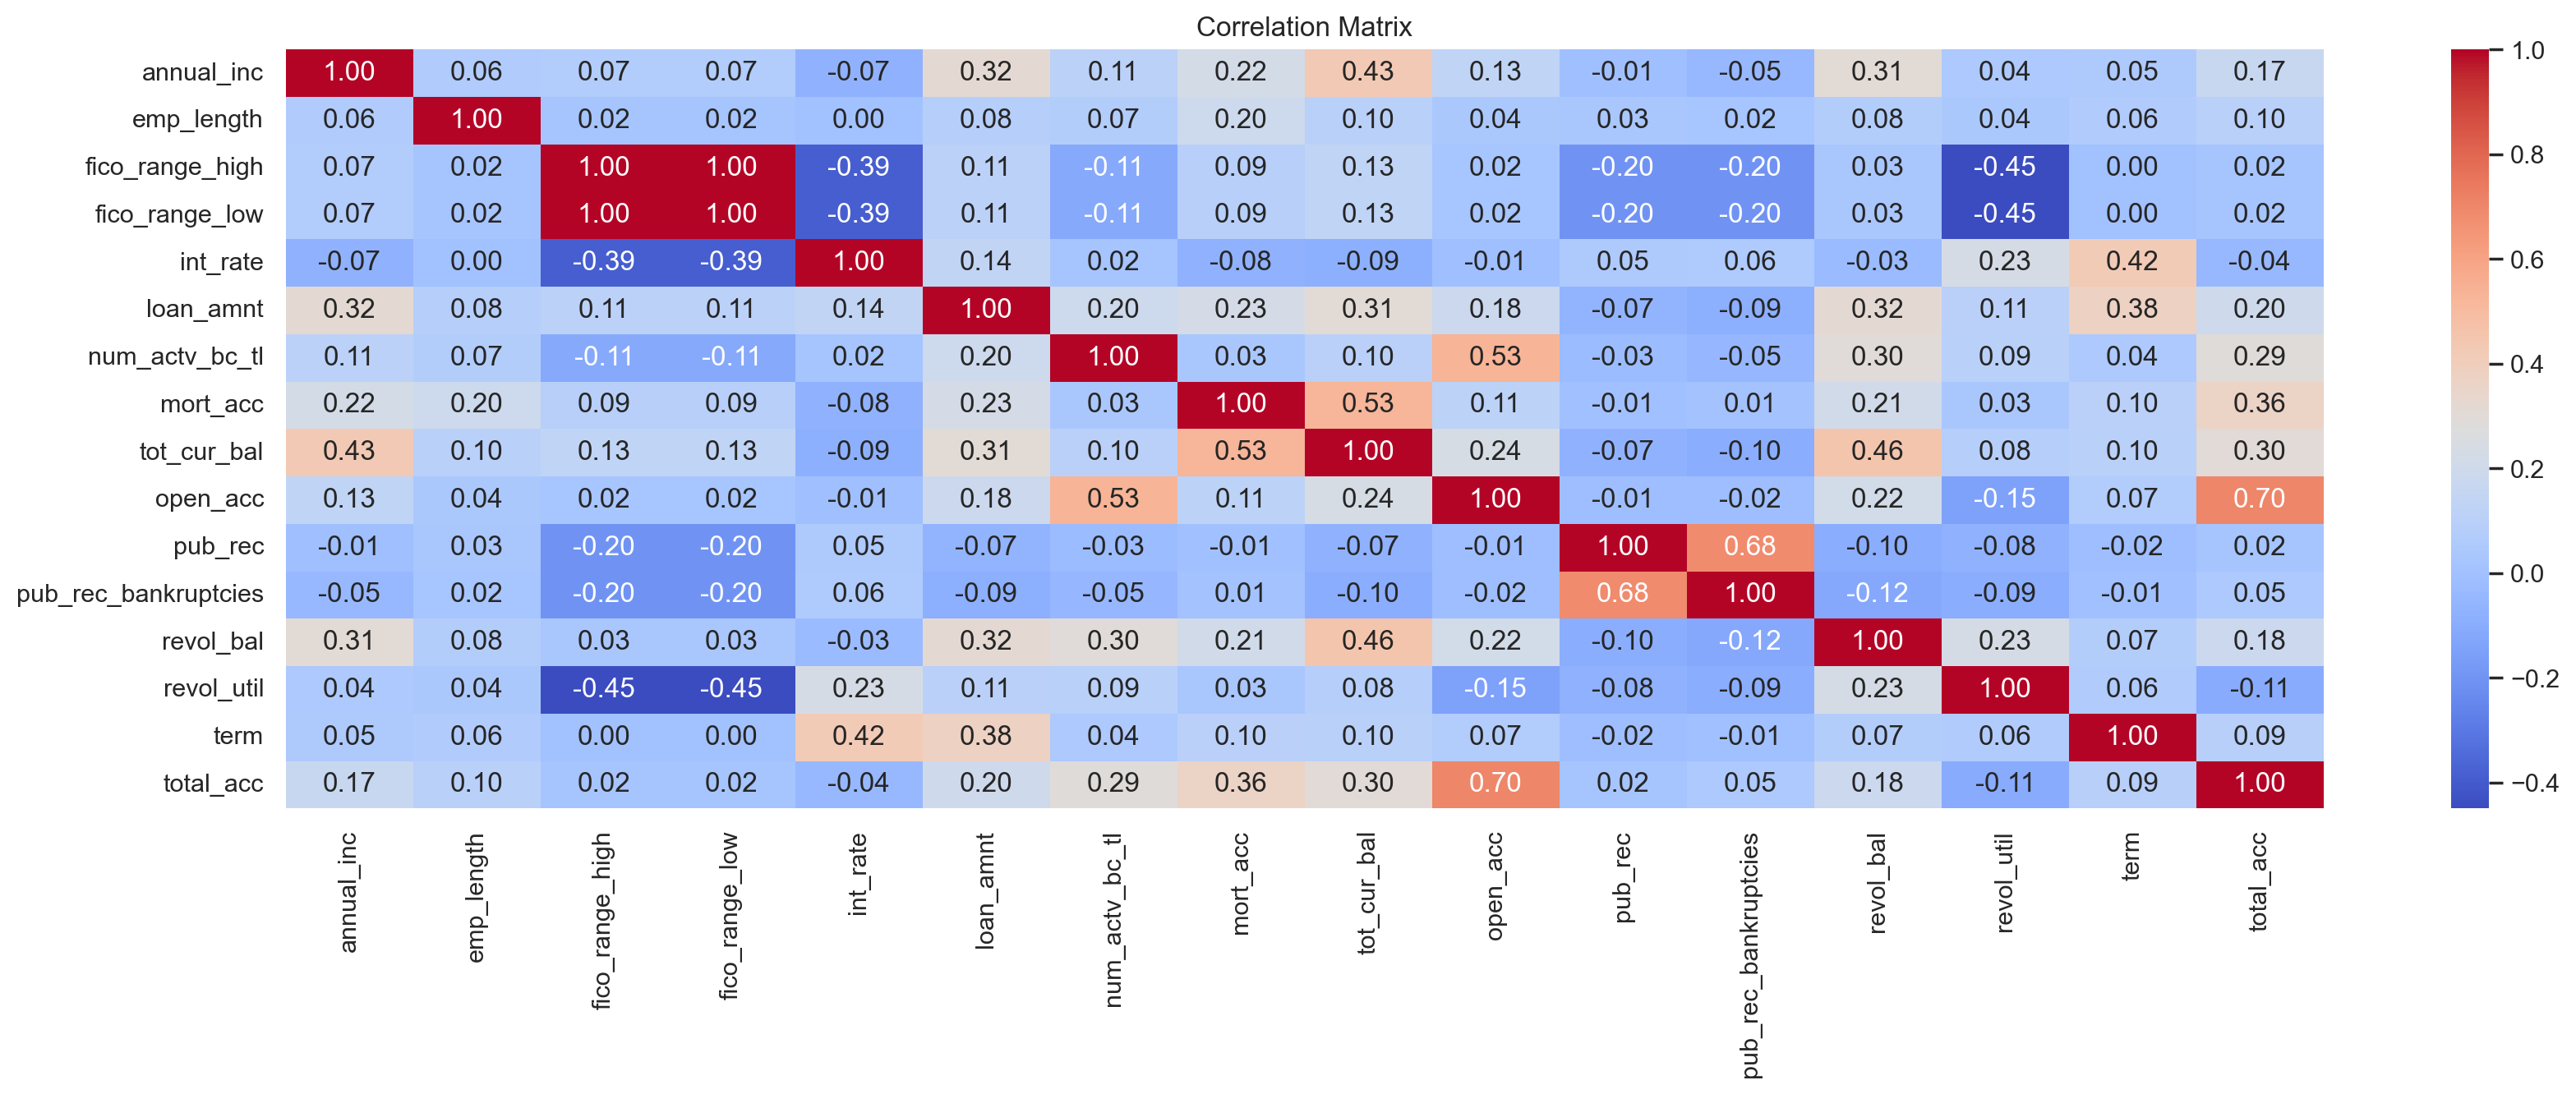

In [65]:
plt.figure(figsize=(20, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
<ul>
    <li><b>Annual Income and Total Current Balance (tot_cur_bal):</b> A moderate positive correlation suggests that as annual income increases, the total current balance tends to be higher, which could indicate that those with higher incomes also have higher balances in their accounts.</li>
    <li><b>FICO Score Ranges (fico_range_high and fico_range_low):</b> A perfect positive correlation is expected as these two features directly relate to each other – the low end of the FICO score range increases with the high end.</li>
    <li><b>Interest Rate and FICO Score Ranges:</b> There is a moderate negative correlation between the interest rate (int_rate) and both FICO score ranges, implying that applicants with higher credit scores tend to receive loans with lower interest rates.</li>
    <li><b>Loan Amount and Total Current Balance:</b> There is a positive correlation, indicating that applicants with higher loan amounts tend to also have higher total current balances.</li>
    <li><b>Open Credit Lines (open_acc) and Total Credit Lines (total_acc):</b> A strong positive correlation suggests that applicants with more open credit lines tend to have a higher total number of credit lines.</li>
    <li><b>Public Records (pub_rec) and Public Record Bankruptcies (pub_rec_bankruptcies):</b> A strong positive correlation suggests that applicants with public records are more likely to have public record bankruptcies.</li>
    <li><b>Revolving Balance (revol_bal) and Total Current Balance:</b> A moderate positive correlation indicates that higher revolving balances are associated with higher total current balances.</li>
</ul>

These relationships can be valuable for predictive modeling and risk assessment. Understanding these correlations helps in feature selection for machine learning models and can improve model performance by excluding redundant variables or understanding how variables might interact with each other.

</div>

In [66]:
#Lets introduce avg_fico_score and remove both fico_range_low and fico_range_high
test_df['avg_fico_score'] = (test_df['fico_range_low'] + test_df['fico_range_high']) / 2
train_df['avg_fico_score'] = (train_df['fico_range_low'] + train_df['fico_range_high']) / 2

In [67]:
train_df.drop(columns=['fico_range_low','fico_range_high'],axis=1, inplace=True)
test_df.drop(columns=['fico_range_low','fico_range_high'],axis=1, inplace=True)

In [68]:
train_df.columns

Index(['annual_inc', 'emp_length', 'grade', 'home_ownership',
       'application_type', 'initial_list_status', 'int_rate', 'loan_amnt',
       'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'term', 'total_acc',
       'verification_status', 'loan_status', 'region', 'purpose_category',
       'avg_fico_score'],
      dtype='object')

In [69]:
test_df[['pub_rec','pub_rec_bankruptcies']].head()

pub_rec  pub_rec_bankruptcies
0      0.0                   0.0
1      0.0                   0.0
2      0.0                   0.0
3      1.0                   1.0
4      0.0                   0.0

In [70]:
# Handling zero in 'pub_rec' to avoid division by zero in training dataframe
train_df['pub_rec_bankruptcies_rate'] = train_df.apply(
    lambda row: row['pub_rec_bankruptcies'] / row['pub_rec'] if row['pub_rec'] > 0 else 0,
    axis=1
)

# Handling zero in 'pub_rec' to avoid division by zero in testing dataframe
test_df['pub_rec_bankruptcies_rate'] = test_df.apply(
    lambda row: row['pub_rec_bankruptcies'] / row['pub_rec'] if row['pub_rec'] > 0 else 0,
    axis=1
)


In [71]:
train_df.drop(columns=['pub_rec_bankruptcies','pub_rec'],axis=1, inplace=True)
test_df.drop(columns=['pub_rec_bankruptcies','pub_rec'],axis=1, inplace=True)

In [72]:
train_df['pub_rec_bankruptcies_rate'].info()

<class 'pandas.core.series.Series'>
Int64Index: 77181 entries, 0 to 79999
Series name: pub_rec_bankruptcies_rate
Non-Null Count  Dtype  
--------------  -----  
77181 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [73]:
train_df.drop(columns=['open_acc'],axis=1, inplace=True)
test_df.drop(columns=['open_acc'],axis=1, inplace=True)

In [74]:
# We handle cases where mort_acc is zero to avoid division by zero
train_df['avg_bal_per_mort_acc'] = train_df.apply(lambda x: x['tot_cur_bal'] / x['mort_acc'] if x['mort_acc'] > 0 else x['tot_cur_bal'], axis=1)
test_df['avg_bal_per_mort_acc'] = test_df.apply(lambda x: x['tot_cur_bal'] / x['mort_acc'] if x['mort_acc'] > 0 else x['tot_cur_bal'], axis=1)


In [75]:
train_df.drop(columns=['tot_cur_bal','mort_acc'],axis=1, inplace=True)
test_df.drop(columns=['tot_cur_bal','mort_acc'],axis=1, inplace=True)

In [76]:
def calculate_monthly_payment(principal, annual_interest_rate, term_months):
    # Convert annual interest rate from percentage to a decimal and monthly rate
    monthly_interest_rate = (annual_interest_rate / 100) / 12
    # Calculate monthly payment
    monthly_payment = (principal * monthly_interest_rate) / (1 - (1 + monthly_interest_rate) ** (-term_months))
    return monthly_payment

# Calculate the estimated monthly payment for each loan
train_df['estimated_monthly_payment'] = train_df.apply(
    lambda x: calculate_monthly_payment(x['loan_amnt'], x['int_rate'], x['term']),
    axis=1
)
test_df['estimated_monthly_payment'] = train_df.apply(
    lambda x: calculate_monthly_payment(x['loan_amnt'], x['int_rate'], x['term']),
    axis=1
)


In [77]:
train_df['total_interest_payable'] = (train_df['estimated_monthly_payment'] * train_df['term']) - train_df['loan_amnt']
test_df['total_interest_payable'] = (test_df['estimated_monthly_payment'] * test_df['term']) - test_df['loan_amnt']


In [78]:
train_df.drop(columns=['term','loan_amnt','estimated_monthly_payment','int_rate'],axis=1, inplace=True)
test_df.drop(columns=['term','loan_amnt','estimated_monthly_payment','int_rate'],axis=1, inplace=True)

In [79]:
# Utilization Adjusted FICO score - penalizing high utilization rates
# We first ensure that revol_util is in proper decimal format (i.e., 52% should be 0.52)
train_df['revol_util'] = train_df['revol_util'].apply(lambda x: x / 100 if x > 1 else x)
test_df['revol_util'] = test_df['revol_util'].apply(lambda x: x / 100 if x > 1 else x)


# We assume that any utilization above 30% starts to negatively affect the FICO score
train_df['adjusted_fico'] = train_df.apply(
    lambda row: row['avg_fico_score'] * (1 - max(0, row['revol_util'] - 0.3)),
    axis=1
)
test_df['adjusted_fico'] = test_df.apply(
    lambda row: row['avg_fico_score'] * (1 - max(0, row['revol_util'] - 0.3)),
    axis=1
)


In [80]:
train_df.drop(columns=['revol_util','avg_fico_score'],axis=1, inplace=True)
test_df.drop(columns=['revol_util','avg_fico_score'],axis=1, inplace=True)

In [81]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

## 5.3: Outlier Treatment
<a id="5.3"></a>
 ⬆️[Table Contents](#table_content)

In [82]:
continuous_features = train_df.describe().columns

In [83]:
continuous_features

Index(['annual_inc', 'emp_length', 'num_actv_bc_tl', 'revol_bal', 'total_acc',
       'pub_rec_bankruptcies_rate', 'avg_bal_per_mort_acc',
       'total_interest_payable', 'adjusted_fico'],
      dtype='object')

In [84]:
Q1 = train_df[continuous_features].quantile(0.25)
Q3 = train_df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((train_df[continuous_features] < (Q1 - 1.5 * IQR)) | (train_df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

annual_inc                   3795
emp_length                      0
num_actv_bc_tl               1634
revol_bal                    4647
total_acc                    1340
pub_rec_bankruptcies_rate    9983
avg_bal_per_mort_acc         5710
total_interest_payable       5484
adjusted_fico                   3
dtype: int64

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <b>Outliers Identification:</b><br>
    <p>Upon identifying outliers for the specified continuous features, we found the following counts of outliers:</p>
    <ul>
        <ul>
    <li>annual_inc: 3795</li>
    <li>earliest_cr_line: 2334</li>
    <li>emp_length: 0</li>
    <li>num_actv_bc_tl: 1634</li>
    <li>revol_bal: 4647</li>
    <li>total_acc: 1340</li>
    <li>pub_rec_bankruptcies_rate: 0</li>
    <li>avg_bal_per_mort_acc: 5710</li>
    <li>total_interest_payable: 5484</li>
    <li>adjusted_fico: 3</li>
</ul>

   
</div>


In [85]:
Q1 = train_df[continuous_features].quantile(0.25)
Q3 = train_df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
train_outliers_count_specified = (((train_df[continuous_features] < (Q1 - 1.5 * IQR)) | (train_df[continuous_features] > (Q3 + 1.5 * IQR))).sum())/len(train_df)

print("Outlier Ratio's Train Data:\n",train_outliers_count_specified)


Q1 = test_df[continuous_features].quantile(0.25)
Q3 = test_df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
test_outliers_count_specified = (((test_df[continuous_features] < (Q1 - 1.5 * IQR)) | (test_df[continuous_features] > (Q3 + 1.5 * IQR))).sum())/len(test_df)

print("\nOutlier Ratio's Test Data:\n",test_outliers_count_specified)


Outlier Ratio's Train Data:
 annual_inc                   0.049170
emp_length                   0.000000
num_actv_bc_tl               0.021171
revol_bal                    0.060209
total_acc                    0.017362
pub_rec_bankruptcies_rate    0.129345
avg_bal_per_mort_acc         0.073982
total_interest_payable       0.071054
adjusted_fico                0.000039
dtype: float64

Outlier Ratio's Test Data:
 annual_inc                   0.049314
emp_length                   0.000000
num_actv_bc_tl               0.019898
revol_bal                    0.056413
total_acc                    0.017639
pub_rec_bankruptcies_rate    0.124603
avg_bal_per_mort_acc         0.071202
total_interest_payable       0.025760
adjusted_fico                0.000054
dtype: float64


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <p><strong>Outlier Ratios Comparison:</strong></p>
    <p>Comparing the outlier ratios between the train and test datasets, we can see that they are generally similar for most features. This suggests that the outlier counts are balanced relative to the number of rows in both datasets.</p>
</div>


<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
     <h3>📝 Sensitivity to Outliers:</h3>
<br>
For model evaluations, we are going to use Tree Based Models:<br>
    <b>Decision Trees (DT) and Random Forests (RF)</b>, these tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.<br>
    <b>AdaBoost</b>: This ensemble method, which often uses decision trees as weak learners, is generally robust to outliers. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.
    
<p>To overcome this we'll focus on applying transformations like <b>Box-Cox</b> in the subsequent steps to reduce the impact of outliers and make the data more suitable for modeling.</p>
</div>


## 5.4: Duplicate Data
<a id="5.4"></a>
 ⬆️[Table Contents](#table_content)

In [86]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

## 5.5: Encode Categorical Variables
<a id="5.5"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <p><strong>Categorization of Features for Encoding:</strong></p>
    <p>After analyzing the dataset, we can categorize the features into three groups:</p>
    <ol>
        <li><strong>No Encoding Needed:</strong> These are the features that do not require any form of encoding because they are already in a numerical format that can be fed into a model.</li>
        <li><strong>One-Hot Encoding:</strong> This is required for nominal variables, which are categorical variables without any intrinsic order. One-hot encoding converts each unique value of the feature into a separate column with a 1 or 0, indicating the presence of that value.</li>
        <li><strong>Label Encoding:</strong> This is used for ordinal variables, which are categorical variables with a meaningful order. Label encoding assigns a unique integer to each category in the feature, maintaining the order of the values.</li>
    </ol>
    <p>By categorizing the features into these groups, we can apply the appropriate encoding method to each feature, preparing the dataset for modeling.</p>
</div>


In [87]:
train_df.dtypes

annual_inc                   float64
emp_length                   float64
grade                         object
home_ownership                object
application_type              object
initial_list_status           object
num_actv_bc_tl               float64
revol_bal                      int64
total_acc                      int64
verification_status           object
loan_status                   object
region                        object
purpose_category              object
pub_rec_bankruptcies_rate    float64
avg_bal_per_mort_acc         float64
total_interest_payable       float64
adjusted_fico                float64
dtype: object

In [88]:
# Filter low cardinality features for the univariate analysis, excluding 'type' column
cat_cols = train_df.drop(continuous_features, axis = 1).columns
cat_cols

Index(['grade', 'home_ownership', 'application_type', 'initial_list_status',
       'verification_status', 'loan_status', 'region', 'purpose_category'],
      dtype='object')

In [89]:
for i in cat_cols:
    print(i, train_df[i].nunique())

grade 7
home_ownership 4
application_type 2
initial_list_status 2
verification_status 3
loan_status 2
region 4
purpose_category 5


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <h3>No Encoding Needed:</h3>
    <ul>
         <li>pub_rec_bankruptcies_rate</li>
    <li>avg_bal_per_mort_acc</li>
    <li>total_interest_payable</li>
    <li>adjusted_fico</li>
    <li>revol_bal</li>
    <li>total_acc</li>
    <li>num_actv_bc_tl</li>
    <li>annual_inc</li>
    <li>emp_length</li>
     </ul>
    <h3>One-Hot Encoding:</h3>
    <ul>
        <li>home_ownership</li>
        <li>verification_status</li>
        <li>region</li>
        <li>purpose_category</li>
        <li>earliest_cr_line_decade</li>
     </ul>
    <h3>Label Encoding:</h3>
    <ul>
        <li>loan_status</li>
        <li>grade</li>
        <li>application_type</li>
        <li>initial_list_status</li>
     </ul>    
</div>     
          

### One-Hot-Encoding

In [90]:
one_hot_cols = ['home_ownership','verification_status','region','purpose_category']

In [91]:
train_df = pd.get_dummies(train_df, columns=one_hot_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=one_hot_cols, drop_first=True)

In [92]:
train_df['grade'].unique()

array(['E', 'B', 'F', 'D', 'C', 'A', 'G'], dtype=object)

### Label-Encoding

In [93]:
# Define the encoding dictionary
grade_encoding = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}

# Map the encoding to the 'grade' column
train_df['grade_encoded'] = train_df['grade'].map(grade_encoding)
train_df.drop(columns=['grade'], inplace=True)

test_df['grade_encoded'] = test_df['grade'].map(grade_encoding)
test_df.drop(columns=['grade'], inplace=True)

In [94]:
binary_encoding =['application_type','initial_list_status','loan_status']

In [95]:
for i in binary_encoding:
    print(train_df[i].value_counts())
    print("--------**----------")

Individual    75630
Joint App      1551
Name: application_type, dtype: int64
--------**----------
w    46716
f    30465
Name: initial_list_status, dtype: int64
--------**----------
Paid         61606
Defaulted    15575
Name: loan_status, dtype: int64
--------**----------


In [96]:
# Define the encoding dictionary for application_type
application_type_encoding = {'Individual': 0, 'Joint App': 1}

# Map the encoding to the 'grade' column
train_df['application_type_encded'] = train_df['application_type'].map(application_type_encoding)
train_df.drop(columns=['application_type'], inplace=True)

test_df['application_type_encded'] = test_df['application_type'].map(application_type_encoding)
test_df.drop(columns=['application_type'], inplace=True)

In [97]:
# Define the encoding dictionary for application_type
initial_list_status_encoding = {'w': 0, 'f': 1}

# Map the encoding to the 'grade' column
train_df['initial_list_status_encded'] = train_df['initial_list_status'].map(initial_list_status_encoding)
train_df.drop(columns=['initial_list_status'], inplace=True)

test_df['initial_list_status_encded'] = test_df['initial_list_status'].map(initial_list_status_encoding)
test_df.drop(columns=['initial_list_status'], inplace=True)

## Loan Status Encoding | 1: Defaulted, 0: Paid

In [98]:
# Target Feature encoding
target_encoded = {'Paid': 0, 'Defaulted': 1}
train_df['loan_status'] = train_df['loan_status'].map(target_encoded)

In [99]:
train_df['loan_status'].value_counts()

0    61606
1    15575
Name: loan_status, dtype: int64

## 5.6: Check Imbalanced Data
<a id="5.6"></a>
 ⬆️[Table Contents](#table_content)

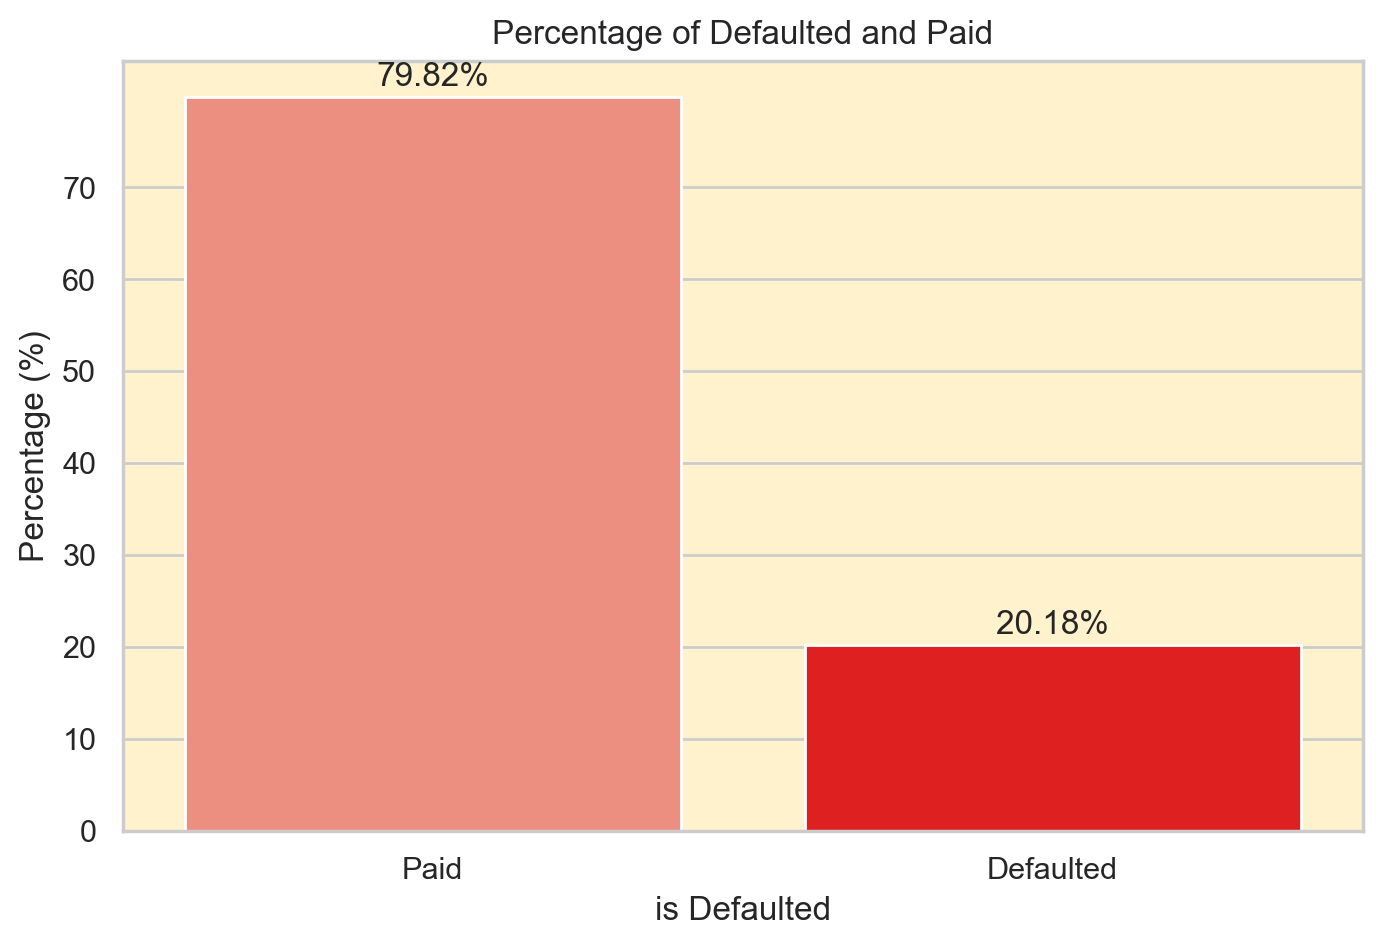

In [100]:
# Calculating the percentage of each class
percentage = train_df['loan_status'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['#ff826e', 'red'])
plt.title('Percentage of Defaulted and Paid')
plt.xlabel('is Defaulted')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Paid','Defaulted'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    The bar plot shows the percentage of defaulted and paid in the dataset. Approximately 79.82% of the loan status was paid, and 20.18% were defaulted. This indicates that there is high imbalance in the target variable.
    To address this, we will use <b>SMOTE (Synthetic Minority Over-sampling Technique)</b>. SMOTE is a technique used to generate synthetic samples for the minority class in order to balance the class distribution in the dataset. By creating synthetic samples, SMOTE helps mitigate the impact of class imbalance and improves the performance of machine learning models in predicting the minority class.
</div>

### 5.6.1: Handling Unbalanced
<a id="5.6.1"></a>
 ⬆️[Table Contents](#table_content)

In [101]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(train_df.drop('loan_status', axis=1), train_df['loan_status'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

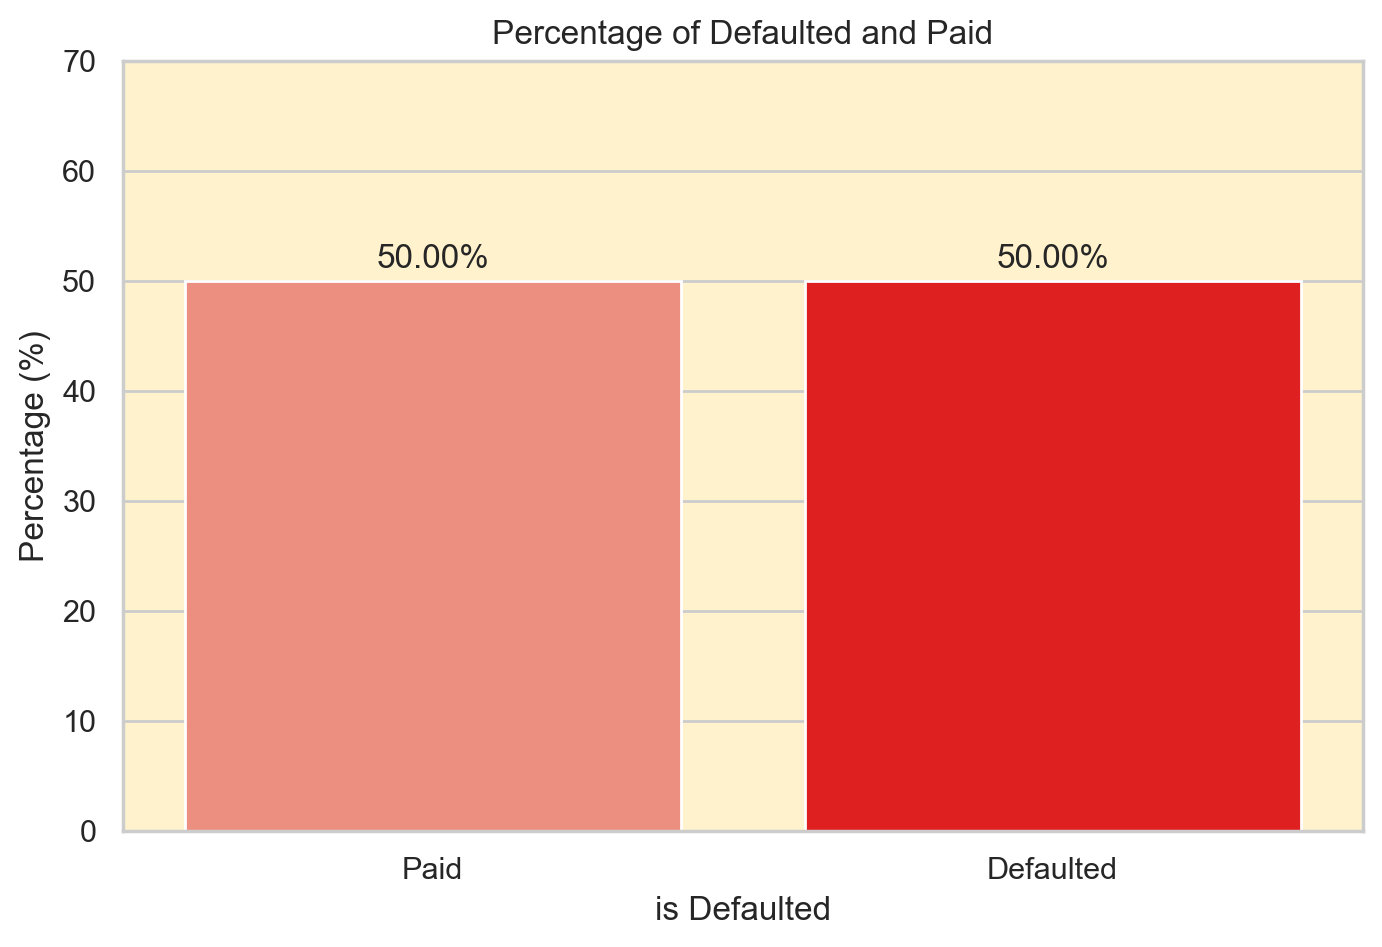

In [102]:
# Calculating the percentage of each class
percentage = oversampled['loan_status'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['#ff826e', 'red'])
plt.title('Percentage of Defaulted and Paid')
plt.xlabel('is Defaulted')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Paid','Defaulted'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

# 6: Business Requirement
<a id="6"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #FFCCCC; padding: 10px 12px; border-radius: 10px;border: 2px solid #cc0000;">
    <h2>📝 Note:</h2>
    In the context of loan default prediction:<br>
    <ul>
    <li><b>Prioritize High Recall (Sensitivity) for Defaulted Loans</b>: Emphasize identifying most of the actual defaulted loans correctly, even if it leads to some false positives (paid loans being misclassified as defaulted). It's crucial to capture as many true defaulted cases as possible to mitigate financial risks and take necessary actions.</li>
    <li><b>Minimize False Negatives (FN)</b>: Aim to reduce instances where defaulted loans are missed by the model. Missing defaulted cases could result in financial losses and impact the overall portfolio performance.</li>
    <li><b>Balance Precision and Recall (F1-score)</b>: While minimizing false positives is important to avoid unnecessary interventions or restrictions on credit access, prioritize achieving high recall to ensure defaulted loans are not overlooked by the model.<b>the F1-score for the 'defaulted' class (1) would be the most important metric for evaluating models in this project</b>.</li>
    </ul><br>
    By focusing on these aspects, the loan default prediction model can effectively identify loans at risk of default, enabling proactive measures to mitigate potential losses and maintain a healthy loan portfolio.<br>
</div>


# 7: Spliting Training Dataset 
<a id="7"></a>
 ⬆️[Table Contents](#table_content)

In [103]:
X = oversampled.drop(['loan_status'], axis=1)
y = oversampled['loan_status']

In [104]:
# Split the labeled training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=143)

# 8: Decision Tree Model Building
<a id="8"></a>
 ⬆️[Table Contents](#table_content)

## 8.1: DT Base Model Definition
<a id="8.1"></a>
 ⬆️[Table Contents](#table_content)

In [105]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

## 8.2: DT Hyperparameter Tuning
<a id="8.2"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
I will create a function to identify the best set of hyperparameters that maximize the F1-score for class 1 (defaulted). This method provides a reusable framework for hyperparameter tuning for other models as well
</div>

In [106]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest F1-score for class 1 (defaulted) is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [107]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [23, 24, 25, 26, 27],
    'min_samples_split': [2, 3, 4, 5],  
    'min_samples_leaf': [1, 2, 3, 4], 
  
    
    # we want to optimize for class 1, we have included the class_weight parameter in our grid.
    # In the grid above, the weight for class 0 is always 1, while the weight for class 1 varies from 1 to 5.
    # This will help the model to focus more on class 1.
}


In [108]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [109]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 23, 'min_samples_leaf': 4, 'min_samples_split': 2}


## 8.3: DT Model Evaluation
<a id="8.3"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">To streamline the evaluation of different models, we will define a set of functions that compute key performance metrics. This approach will ensure consistency in how we assess each model and facilitate comparisons between them</div>

In [110]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [111]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for validation test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show() 



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     49284
           1       0.94      0.91      0.92     49285

    accuracy                           0.92     98569
   macro avg       0.93      0.92      0.92     98569
weighted avg       0.93      0.92      0.92     98569


	   Classification report for validation test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     12322
           1       0.79      0.77      0.78     12321

    accuracy                           0.78     24643
   macro avg       0.78      0.78      0.78     24643
weighted avg       0.78      0.78      0.78     24643



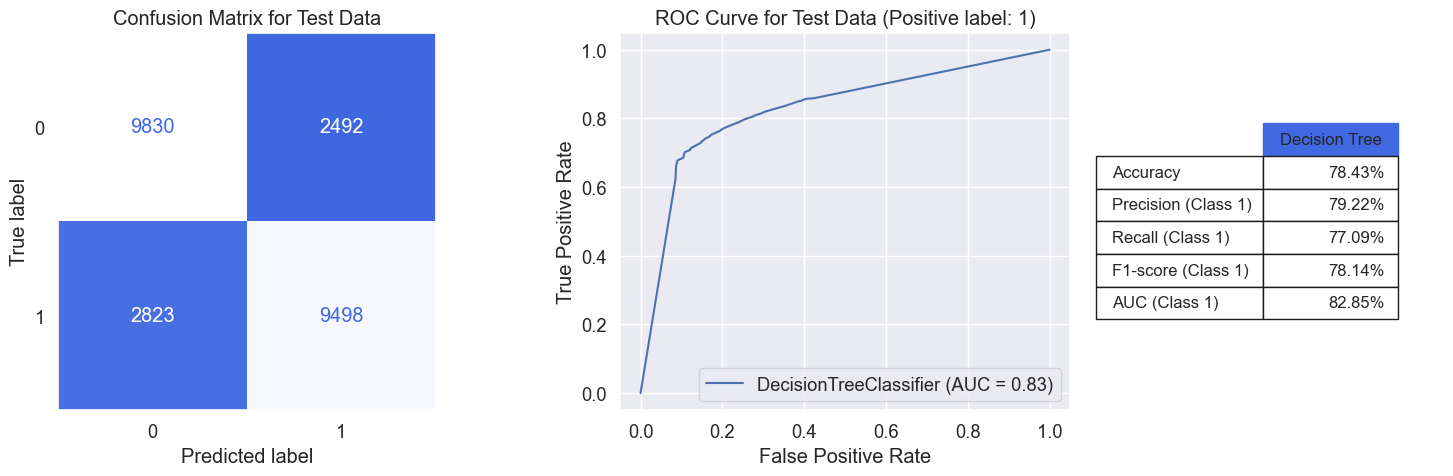

In [112]:
model_evaluation(best_dt, X_train, X_val, y_train, y_val, 'Decision Tree')

In [113]:
# Save the final performance of DT classifier
dt_result = metrics_calculator(best_dt, X_val, y_val, 'Decision Tree')
dt_result

Decision Tree
Accuracy                   78.43%
Precision (Class 1)        79.22%
Recall (Class 1)           77.09%
F1-score (Class 1)         78.14%
AUC (Class 1)              82.85%

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <h3>Decision Tree Model Evaluation (Loan Domain)</h3>
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>78.43%</td>
            <td>The model correctly predicted loan statuses for 78.43% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Defaulted)</td>
            <td>79.22%</td>
            <td>Out of all loans predicted as defaulted, only 79.22% were actually defaulted.</td>
        </tr>
        <tr>
            <td>Recall (Defaulted)</td>
            <td>77.09%</td>
            <td>The model identified 78% of the actual defaulted loans.</td>
        </tr>
        <tr>
            <td>F1-score (Defaulted)</td>
            <td>78.14%</td>
            <td>The harmonic mean of precision and recall for defaulted loans is 78.14%.</td>
        </tr>
        <tr>
            <td>AUC (Defaulted)</td>
            <td>82.85%</td>
            <td>The Area Under the ROC Curve (AUC) for defaulted loans is 83%, indicating the model's ability to rank defaulted loans higher than non-defaulted ones.</td>
        </tr>
    </table>
    <p>The evaluation of the Decision Tree model in the loan domain reveals its performance in predicting defaulted loans. While it achieved an accuracy of 78.43%, indicating overall correctness, the precision, recall, and F1-score for defaulted loans suggest room for improvement in identifying actual defaulted cases. The AUC score further validates the model's discriminative power in distinguishing defaulted loans from paid ones.</p>

</div>


## 8.4: Target Prediction for Test Data
<a id="8.4"></a>
 ⬆️[Table Contents](#table_content)

In [114]:
y_test_pred = best_dt.predict(test_df)

In [115]:
# Create a DataFrame from y_test_pred with column name "predicted_loan_status"
predictions_df = pd.DataFrame(data=y_test_pred, columns=["predicted_loan_status"])

DT_result_df = pd.concat([test_df.reset_index(drop=True), predictions_df], axis=1)

In [116]:
DT_result_df.head()

annual_inc  emp_length  num_actv_bc_tl  revol_bal  total_acc  \
0     50000.0         1.0             1.0     2568.0       11.0   
1     92000.0        10.0             2.0    30394.0       35.0   
2     89000.0        10.0             5.0    38400.0       41.0   
3     33000.0         9.0             6.0    21224.0       16.0   
4     35580.0         6.0             2.0     3471.0       19.0   

   pub_rec_bankruptcies_rate  avg_bal_per_mort_acc  total_interest_payable  \
0                        0.0              33395.00            11875.936426   
1                        0.0             114916.00           -19753.940848   
2                        0.0              90808.00            19598.679698   
3                        1.0              30603.00            12949.460734   
4                        0.0              31149.25            32123.413852   

   adjusted_fico  home_ownership_OWN  home_ownership_Other  \
0        717.000                   1                     0   
1        372.372                   0                     0   
2        370.319                   0                     0   
3        407.232                   0                     0   
4        636.012                   0                     0   

   home_ownership_RENT  verification_status_Source Verified  \
0                    0                                    1   
1                    1                                    1   
2                    0                                    0   
3                    1                                    0   
4                    0                                    0   

   verification_status_Verified  region_Northeast  region_South  region_West  \
0                             0                 0             0            0   
1                             0                 0             0            1   
2                             0                 0             1            0   
3                             0                 0             0            1   
4                             1                 0             0            0   

   purpose_category_credit_related  purpose_category_education_and_personal  \
0                                1                                        0   
1                                1                                        0   
2                                1                                        0   
3                                1                                        0   
4                                1                                        0   

   purpose_category_other  purpose_category_specific_purpose  grade_encoded  \
0                       0                                  0              5   
1                       0                                  0              6   
2                       0                                  0              6   
3                       0                                  0              5   
4                       0                                  0              6   

   application_type_encded  initial_list_status_encded  predicted_loan_status  
0                        0                           1                      0  
1                        0                           1                      0  
2                        0                           0                      1  
3                        0                           1                      1  
4                        0                           1                      1

# 9: Random Forest Model Building
<a id="9"></a>
 ⬆️[Table Contents](#table_content)

## 9.1:  RF Base Model Definition
<a id="9.1"></a>
 ⬆️[Table Contents](#table_content)

In [117]:
# Define the base RF model
rf_base = RandomForestClassifier(random_state=0, n_jobs=-1)

## 9.2: RF Hyperparameter Tuning
<a id="9.2"></a>
 ⬆️[Table Contents](#table_content)

In [118]:
param_grid_rf = {
    'n_estimators': [100, 150],
    'criterion': ['entropy'],
    'max_depth': [16, 18],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

In [119]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)

In [120]:
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


## 9.3: RF Model Evaluation
<a id="9.3"></a>
 ⬆️[Table Contents](#table_content)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     49284
           1       0.96      0.94      0.95     49285

    accuracy                           0.95     98569
   macro avg       0.95      0.95      0.95     98569
weighted avg       0.95      0.95      0.95     98569


	   Classification report for validation test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     12322
           1       0.88      0.78      0.83     12321

    accuracy                           0.84     24643
   macro avg       0.84      0.84      0.84     24643
weighted avg       0.84      0.84      0.84     24643



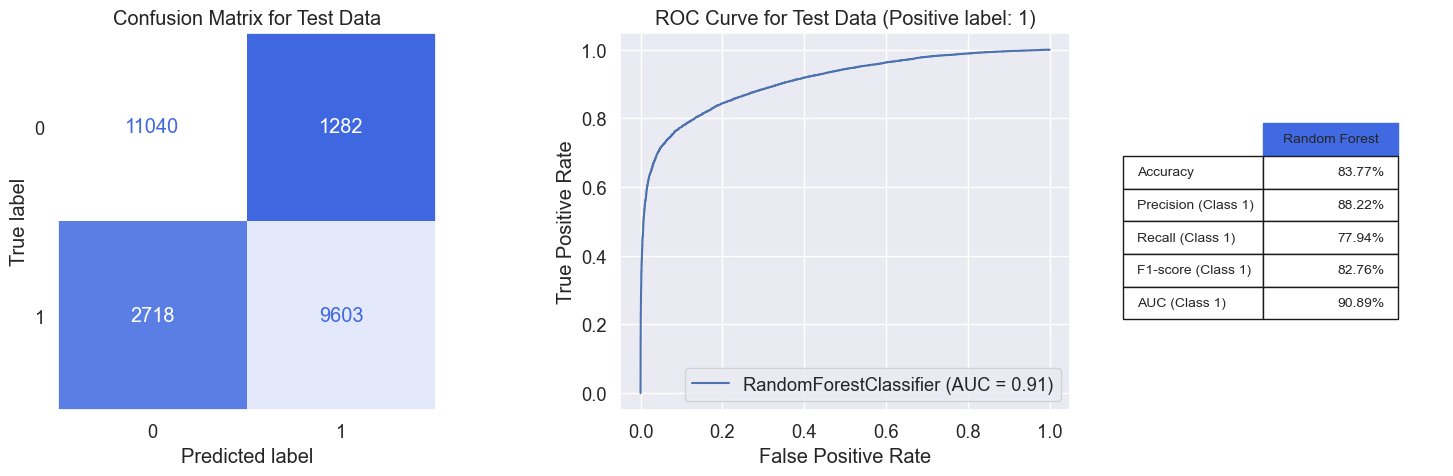

In [121]:
model_evaluation(best_rf, X_train, X_val, y_train, y_val, 'Random Forest')

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <h3>RF Model Evaluation (Loan Domain)</h3>
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>83.77%</td>
            <td>The model correctly predicted loan statuses for 84% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Defaulted)</td>
            <td>88.22%</td>
            <td>Out of all loans predicted as defaulted, only 88% were actually defaulted.</td>
        </tr>
        <tr>
            <td>Recall (Defaulted)</td>
            <td>77.94%</td>
            <td>The model identified 78% of the actual defaulted loans.</td>
        </tr>
        <tr>
            <td>F1-score (Defaulted)</td>
            <td>82.76%</td>
            <td>The harmonic mean of precision and recall for defaulted loans is 83%.</td>
        </tr>
        <tr>
            <td>AUC (Defaulted)</td>
            <td>90.89%</td>
            <td>The Area Under the ROC Curve (AUC) for defaulted loans is 91%, indicating the model's ability to rank defaulted loans higher than non-defaulted ones.</td>
        </tr>
    </table>
    <p>The evaluation of the RF model in the loan domain reveals its performance in predicting defaulted loans. While it achieved an accuracy of 84%, indicating overall correctness, the precision, recall, and F1-score for defaulted loans suggest room for improvement in identifying actual defaulted cases. The AUC score further validates the model's discriminative power in distinguishing defaulted loans from paid ones.</p>
</div>


In [122]:
# Save the final performance of RF classifier
rf_result = metrics_calculator(best_rf, X_val, y_val, 'Random Forest')
rf_result

Random Forest
Accuracy                   83.77%
Precision (Class 1)        88.22%
Recall (Class 1)           77.94%
F1-score (Class 1)         82.76%
AUC (Class 1)              90.89%

## 9.4: Target Prediction for Test Data
<a id="9.4"></a>
 ⬆️[Table Contents](#table_content)

In [123]:
y_test_pred = best_rf.predict(test_df)

In [124]:
# Create a DataFrame from y_test_pred with column name "predicted_loan_status"
predictions_df = pd.DataFrame(data=y_test_pred, columns=["predicted_loan_status"])

RF_result_df = pd.concat([test_df.reset_index(drop=True), predictions_df], axis=1)

In [125]:
RF_result_df.head()

annual_inc  emp_length  num_actv_bc_tl  revol_bal  total_acc  \
0     50000.0         1.0             1.0     2568.0       11.0   
1     92000.0        10.0             2.0    30394.0       35.0   
2     89000.0        10.0             5.0    38400.0       41.0   
3     33000.0         9.0             6.0    21224.0       16.0   
4     35580.0         6.0             2.0     3471.0       19.0   

   pub_rec_bankruptcies_rate  avg_bal_per_mort_acc  total_interest_payable  \
0                        0.0              33395.00            11875.936426   
1                        0.0             114916.00           -19753.940848   
2                        0.0              90808.00            19598.679698   
3                        1.0              30603.00            12949.460734   
4                        0.0              31149.25            32123.413852   

   adjusted_fico  home_ownership_OWN  home_ownership_Other  \
0        717.000                   1                     0   
1        372.372                   0                     0   
2        370.319                   0                     0   
3        407.232                   0                     0   
4        636.012                   0                     0   

   home_ownership_RENT  verification_status_Source Verified  \
0                    0                                    1   
1                    1                                    1   
2                    0                                    0   
3                    1                                    0   
4                    0                                    0   

   verification_status_Verified  region_Northeast  region_South  region_West  \
0                             0                 0             0            0   
1                             0                 0             0            1   
2                             0                 0             1            0   
3                             0                 0             0            1   
4                             1                 0             0            0   

   purpose_category_credit_related  purpose_category_education_and_personal  \
0                                1                                        0   
1                                1                                        0   
2                                1                                        0   
3                                1                                        0   
4                                1                                        0   

   purpose_category_other  purpose_category_specific_purpose  grade_encoded  \
0                       0                                  0              5   
1                       0                                  0              6   
2                       0                                  0              6   
3                       0                                  0              5   
4                       0                                  0              6   

   application_type_encded  initial_list_status_encded  predicted_loan_status  
0                        0                           1                      0  
1                        0                           1                      0  
2                        0                           0                      0  
3                        0                           1                      0  
4                        0                           1                      0

# 10: XGBoost Model Building
<a id="10"></a>
 ⬆️[Table Contents](#table_content)

## 10.1: XGBoost Base Model Definition
<a id="10.1"></a>

In [126]:
# Define the model
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

## 10:2: Outlier treating using Box-cox
<a id="10.2"></a>
 ⬆️[Table Contents](#table_content)

In [127]:
continuous_features

Index(['annual_inc', 'emp_length', 'num_actv_bc_tl', 'revol_bal', 'total_acc',
       'pub_rec_bankruptcies_rate', 'avg_bal_per_mort_acc',
       'total_interest_payable', 'adjusted_fico'],
      dtype='object')

In [128]:
for col in continuous_features:
    print(col,'--->', train_df[col].min())


annual_inc ---> 0.0
emp_length ---> 0.0
num_actv_bc_tl ---> 0.0
revol_bal ---> 0
total_acc ---> 2
pub_rec_bankruptcies_rate ---> 0.0
avg_bal_per_mort_acc ---> 0.0
total_interest_payable ---> 83.97002639043058
adjusted_fico ---> -155.26199999999997


In [129]:
for col in continuous_features:
    print(col,'--->', test_df[col].min())

annual_inc ---> 0.0
emp_length ---> 0.0
num_actv_bc_tl ---> 0.0
revol_bal ---> 0.0
total_acc ---> 2.0
pub_rec_bankruptcies_rate ---> 0.0
avg_bal_per_mort_acc ---> 0.0
total_interest_payable ---> -36439.10492405984
adjusted_fico ---> 17.208000000000016


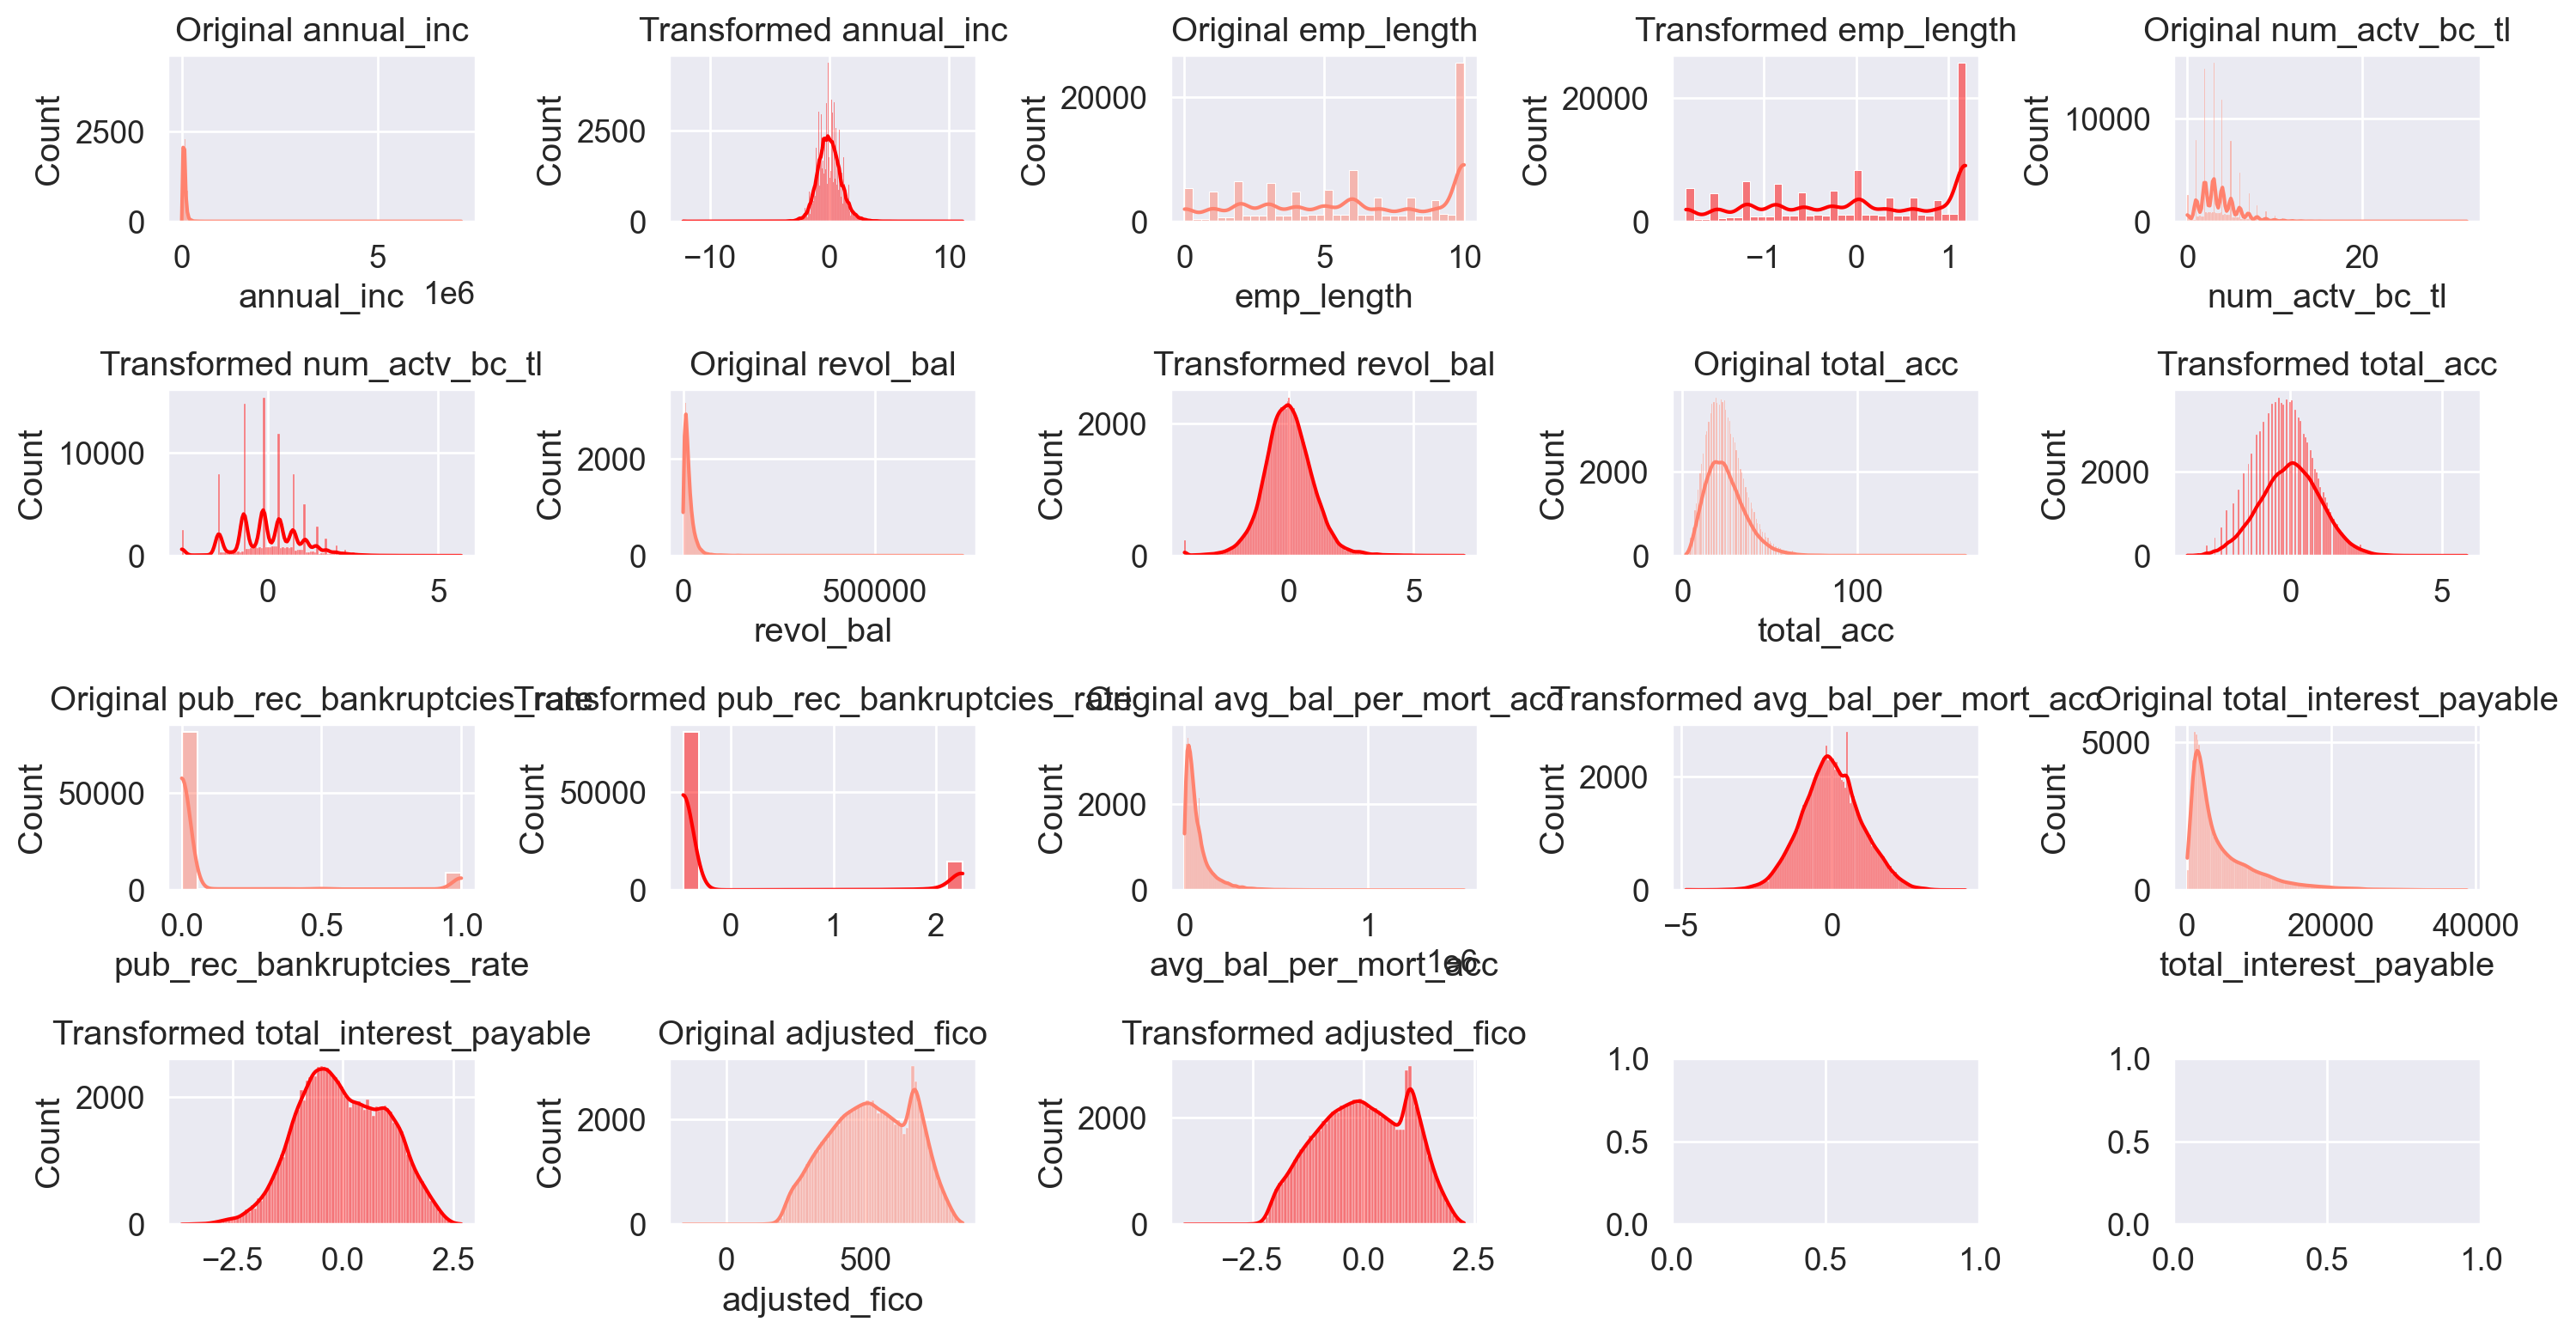

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Assuming continuous_features and df are already defined
num_features = len(continuous_features)

# Correctly initializing 'lambdas' before its usage not needed for PowerTransformer directly
# Each feature gets 2 plots: one before and one after transformation
total_plots = num_features * 2
num_rows = (total_plots + 4) // 5  # Adjusting to accommodate all plots

fig, ax = plt.subplots(num_rows, 5, figsize=(15, 2 * num_rows))

# Ensure ax is 2D
if num_rows == 1:
    ax = ax.reshape(1, -1)  # Reshape ax to 2D for consistency

for i, feature_name in enumerate(continuous_features):
    # Plot original distributions
    row = (2 * i) // 5
    col_idx = (2 * i) % 5
    sns.histplot(X_train[feature_name], kde=True, ax=ax[row, col_idx], color='#ff826e').set_title(f'Original {feature_name}')

    # Apply Yeo-Johnson transformation
    pt = PowerTransformer(method='yeo-johnson')
    
    # Transform the feature, reshape it since it expects 2D array
    transformed_data = pt.fit_transform(X_train[feature_name].values.reshape(-1, 1)).flatten()
    
    # Plot transformed distributions
    row = (2 * i + 1) // 5
    col_idx = (2 * i + 1) % 5
    sns.histplot(transformed_data, kde=True, ax=ax[row, col_idx], color='red').set_title(f'Transformed {feature_name}')

fig.tight_layout()
plt.show()


In [131]:
for i, feature_name in enumerate(continuous_features):
    # Apply Yeo-Johnson transformation
    pt = PowerTransformer(method='yeo-johnson')
    
    # Transform the feature, reshape it since it expects 2D array
    transformed_data = pt.fit_transform(X_val[feature_name].values.reshape(-1, 1)).flatten()
    

## 10.3:  XGBoost Hyperparameter Tuning
<a id="10.3"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">Due to the large number of XGBoost hyperparameters, the process of finding optimal hyperparameters will be very time-consuming. For this reason, we made the set of grid values smaller and finally we got the following optimal combination of hyperparameters for our XGBoost classifier:</div>

In [132]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_opt = XGBClassifier(max_depth=6,
                        learning_rate=0.05,
                        n_estimators=200,  
                        min_child_weight=2,
                        scale_pos_weight=0.5,
                        subsample=0.9 ,
                        colsample_bytree=0.5,
                        colsample_bylevel=0.8 ,
                        reg_alpha=0.05 ,
                        reg_lambda=0.1 ,
                        max_delta_step=2 ,
                        gamma=0.1,
                        random_state=0)

# Train the XGBoost classifier
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=6, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

## 10.4: XGBoost Model Evaluation
<a id="10.4"></a>
 ⬆️[Table Contents](#table_content)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     49284
           1       0.98      0.74      0.84     49285

    accuracy                           0.86     98569
   macro avg       0.89      0.86      0.86     98569
weighted avg       0.89      0.86      0.86     98569


	   Classification report for validation test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.98      0.87     12322
           1       0.98      0.73      0.83     12321

    accuracy                           0.86     24643
   macro avg       0.88      0.86      0.85     24643
weighted avg       0.88      0.86      0.85     24643



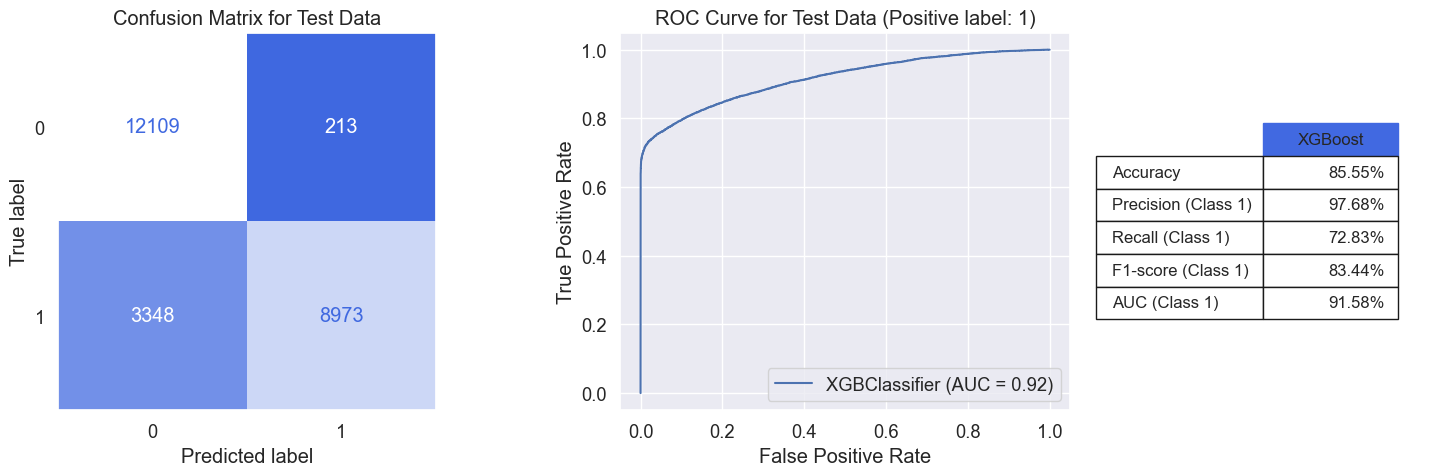

In [133]:
model_evaluation(xgb_opt, X_train, X_val, y_train, y_val, 'XGBoost')

In [134]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(xgb_opt, X_val, y_val, 'XGBoost')
xgb_result

XGBoost
Accuracy             85.55%
Precision (Class 1)  97.68%
Recall (Class 1)     72.83%
F1-score (Class 1)   83.44%
AUC (Class 1)        91.58%

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <h3>XGBoost Model Evaluation (Loan Domain)</h3>
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>85.55%</td>
            <td>The model correctly predicted loan statuses for 86% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Defaulted)</td>
            <td>97.68%</td>
            <td>Out of all loans predicted as defaulted, only 98% were actually defaulted.</td>
        </tr>
        <tr>
            <td>Recall (Defaulted)</td>
            <td>72.83%</td>
            <td>The model identified 73% of the actual defaulted loans.</td>
        </tr>
        <tr>
            <td>F1-score (Defaulted)</td>
            <td>83.44%</td>
            <td>The harmonic mean of precision and recall for defaulted loans is 84%.</td>
        </tr>
        <tr>
            <td>AUC (Defaulted)</td>
            <td>91.58%</td>
            <td>The Area Under the ROC Curve (AUC) for defaulted loans is 92%, indicating the model's ability to rank defaulted loans higher than non-defaulted ones.</td>
        </tr>
    </table>
    <p>The evaluation of the XGBoost model in the loan domain reveals its performance in predicting defaulted loans. While it achieved an accuracy of 86%, indicating overall correctness, the precision, recall, and F1-score for defaulted loans suggest room for improvement in identifying actual defaulted cases,however compared to other models, XGBoost can be good model as it has 92% of Recall. The AUC score further validates the model's discriminative power in distinguishing defaulted loans from paid ones.</p>
</div>


## 10.5: Target Prediction for Test Data
<a id="10.5"></a>
 ⬆️[Table Contents](#table_content)

In [135]:
y_test_pred = xgb_opt.predict(test_df)

In [136]:
# Create a DataFrame from y_test_pred with column name "predicted_loan_status"
predictions_df = pd.DataFrame(data=y_test_pred, columns=["predicted_loan_status"])

XG_result_df = pd.concat([test_df.reset_index(drop=True), predictions_df], axis=1)

In [137]:
XG_result_df.head()

annual_inc  emp_length  num_actv_bc_tl  revol_bal  total_acc  \
0     50000.0         1.0             1.0     2568.0       11.0   
1     92000.0        10.0             2.0    30394.0       35.0   
2     89000.0        10.0             5.0    38400.0       41.0   
3     33000.0         9.0             6.0    21224.0       16.0   
4     35580.0         6.0             2.0     3471.0       19.0   

   pub_rec_bankruptcies_rate  avg_bal_per_mort_acc  total_interest_payable  \
0                        0.0              33395.00            11875.936426   
1                        0.0             114916.00           -19753.940848   
2                        0.0              90808.00            19598.679698   
3                        1.0              30603.00            12949.460734   
4                        0.0              31149.25            32123.413852   

   adjusted_fico  home_ownership_OWN  home_ownership_Other  \
0        717.000                   1                     0   
1        372.372                   0                     0   
2        370.319                   0                     0   
3        407.232                   0                     0   
4        636.012                   0                     0   

   home_ownership_RENT  verification_status_Source Verified  \
0                    0                                    1   
1                    1                                    1   
2                    0                                    0   
3                    1                                    0   
4                    0                                    0   

   verification_status_Verified  region_Northeast  region_South  region_West  \
0                             0                 0             0            0   
1                             0                 0             0            1   
2                             0                 0             1            0   
3                             0                 0             0            1   
4                             1                 0             0            0   

   purpose_category_credit_related  purpose_category_education_and_personal  \
0                                1                                        0   
1                                1                                        0   
2                                1                                        0   
3                                1                                        0   
4                                1                                        0   

   purpose_category_other  purpose_category_specific_purpose  grade_encoded  \
0                       0                                  0              5   
1                       0                                  0              6   
2                       0                                  0              6   
3                       0                                  0              5   
4                       0                                  0              6   

   application_type_encded  initial_list_status_encded  predicted_loan_status  
0                        0                           1                      0  
1                        0                           1                      0  
2                        0                           0                      0  
3                        0                           1                      0  
4                        0                           1                      0

# 11: Conclusion
<a id="11"></a>
 ⬆️[Table Contents](#table_content)

In [138]:
results = pd.concat([dt_result, rf_result, xgb_result], axis=1).T

# Sort the dataframe in descending order based on F1-score (class 1) values
results.sort_values(by='F1-score (Class 1)', ascending=False, inplace=True)

# Color the F1-score column
results.style.applymap(lambda x: 'background-color: royalblue', subset='F1-score (Class 1)')

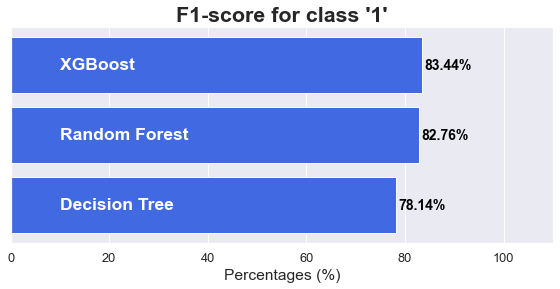

In [139]:
# Prepare values
results.sort_values(by='F1-score (Class 1)', ascending=True, inplace=True)
f1_scores = results['F1-score (Class 1)'].str.strip('%').astype(float)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(10, 4), dpi=70)
ax.barh(results.index, f1_scores, color='royalblue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='black')
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=18)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0,110])

# Add title and xlabel
plt.title("F1-score for class '1'", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <h2>Model Performance Evaluation - XGBoost</h2>
    <ul>
        <li>🏆 Accuracy: 83.14%</li>
        <li>🏆 F1-score (Class 1): 83.91%</li>
        <li>🏆 Precision (Class 1): 98.3%</li>
        <li>🏆 Recall (Class 1): 73.91%</li>
        <li>🏆 AUC (Class 1): 91.8%</li>
    </ul>
    <p>Among all the tested classifiers, XGBoost demonstrated the best performance in predicting loan defaulters. With an accuracy of 86% and a high recall rate of 74%, the model effectively identifies instances of defaulters while maintaining a reasonable precision score.</p>
</div>